# **DATA ANALYTICS - TECHNOLOGY FESTIVAL (TECHFEST) 2025**

## **"Efektivitas Penyaluran Dana Transfer ke Daerah (TKDD): Studi Perbandingan Pagu dan Realisasi TKDD di Provinsi-Provinsi Indonesia Tahun 2023"**

---

### **Nama Tim:** Pop Corn

### **Anggota Tim:**
1. Anugerah Surya Atmaja  
2. Naufal Fadli Muzakki

### **Instansi:** Politeknik Statistika STIS

---

In [1]:
# Library untuk Manipulasi dan Analisis Data
import pandas as pd          # Untuk manipulasi dan analisis data berbasis tabel (DataFrame)
import geopandas as gpd      # Untuk manipulasi data spasial (peta, shapefile, GeoJSON)
import numpy as np           # Untuk operasi numerik dan array

# Library untuk Visualisasi Data
import matplotlib.pyplot as plt     # Untuk membuat visualisasi data dasar (plot, chart)
import seaborn as sns               # Untuk visualisasi statistik yang lebih menarik dan kompleks
from matplotlib.patches import Patch  # Untuk membuat legend kustom pada plot
import matplotlib.patches as mpatches  # Alternatif pembuatan elemen visual (misal: legend khusus)

# Library untuk Statistik dan Analisis
from scipy.stats import shapiro      # Uji normalitas Shapiro-Wilk
from scipy.stats import wilcoxon     # Uji Wilcoxon (non-parametrik)
from scipy.stats import pearsonr     # Uji korelasi Pearson
import scipy.stats as stats          # Fungsi statistik tambahan (uji chi-square)
import statsmodels.api as sm         # Untuk analisis regresi linear dan uji statistik lanjutan

# Library Pendukung
import warnings
warnings.filterwarnings("ignore")     # Menghilangkan warning agar output lebih bersih


/home/anugerahsurya/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **1. Latar Belakang**

Setiap awal tahun, pemerintah pusat Indonesia menetapkan anggaran besar untuk mendukung pembangunan di berbagai daerah melalui mekanisme Transfer ke Daerah dan Dana Desa (TKDD). Dana ini berfungsi layaknya bahan bakar utama bagi mesin pembangunan nasional, memungkinkan pemerintah daerah memperbaiki infrastruktur, meningkatkan kualitas layanan publik, dan mengurangi kesenjangan antarwilayah. Melalui TKDD, provinsi-provinsi di Indonesia menerima pagu, yaitu batas maksimal dana yang dapat mereka manfaatkan untuk membiayai pembangunan, termasuk di bidang jalan, pendidikan, kesehatan, dan kebutuhan publik lainnya. Namun, kenyataannya tidak semua daerah mampu menyerap alokasi dana tersebut secara optimal. Beberapa provinsi berhasil merealisasikan hampir 100% dari pagunya, sementara yang lain masih jauh dari target. Fenomena ini menimbulkan pertanyaan besar terkait efektivitas pengelolaan dana publik. Tidak hanya tentang seberapa besar dana yang dialokasikan, tetapi juga tentang bagaimana dana tersebut benar-benar diterjemahkan menjadi manfaat konkret bagi masyarakat.

Efektivitas realisasi anggaran menjadi sangat penting karena dana yang besar tidak selalu menjamin hasil pembangunan yang memadai. Beberapa studi menunjukkan bahwa kinerja fiskal suatu daerah tidak hanya dipengaruhi oleh besar kecilnya dana yang diterima, tetapi juga oleh kapasitas kelembagaan, kualitas tata kelola, dan partisipasi masyarakat [(Sofilda, 2022)](https://doi.org/10.1080/23322039.2023.2220520). Lebih jauh lagi, apakah provinsi yang mampu menyerap lebih banyak dana otomatis menunjukkan peningkatan kesejahteraan masyarakatnya masih menjadi persoalan yang layak dikaji. Salah satu indikator yang dapat digunakan untuk menilai kualitas hidup masyarakat adalah Indeks Pembangunan Manusia (IPM), yang mencakup aspek pendidikan, kesehatan, dan standar hidup [(Imantria, 2024)](https://doi.org/10.15294/edaj.v13i2.78979).

Studi ini bertujuan untuk menelusuri lebih jauh hubungan antara pagu TKDD, realisasi anggaran, dan dampaknya terhadap kesejahteraan masyarakat yang tercermin melalui IPM. Penelitian ini diharapkan dapat memberikan gambaran apakah besarnya dana yang dikucurkan oleh pemerintah pusat selalu sejalan dengan hasil pembangunan yang diharapkan, ataukah ada faktor-faktor lain yang mempengaruhi efektivitas penggunaan dana tersebut. Berdasarkan latar belakang tersebut, rumusan masalah penelitian ini adalah sebagai berikut.
1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023? 
2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah? 
3. Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?
4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?
5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?


## **2. Data Understanding**

In [2]:
# Mengimpor dataset yang diberikan
data = pd.read_excel("Dataset Lomba Data Analytics TECHFEST 2025.xlsx")
data

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5.744761e+06,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2.529543e+06,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1.435636e+06,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5.127605e+06,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2.758522e+06,11.04,180696.04,48360000,5.07
5,DKI JAKARTA,83.55,2.469499e+13,2.508018e+13,10640000.0,2.357160e+06,4.44,3443026.23,322619000,4.96
6,GORONTALO,71.25,6.172420e+12,6.155410e+12,1198400.0,5.136357e+06,15.15,51366.74,42341000,4.50
7,JAMBI,73.73,1.523207e+13,1.535267e+13,3633200.0,4.225661e+06,7.58,293780.01,79850000,4.67
8,JAWA BARAT,74.24,7.132176e+13,7.103169e+13,49306800.0,1.440606e+06,7.62,2625225.72,52652000,5.00
9,JAWA TENGAH,73.39,6.712969e+13,6.677206e+13,37180400.0,1.795894e+06,10.77,1695621.57,45167000,4.97


**Deskripsi Dataset**

Dataset ini berisi informasi mengenai alokasi dan realisasi Transfer ke Daerah dan Dana Desa (TKDD) untuk setiap provinsi di Indonesia pada tahun 2023. Dataset diunduh dari link [http://bit.ly/Dataset_DataAnalytics_TechFest2025](http://bit.ly/Dataset_DataAnalytics_TechFest2025)

**Penjelasan Variabel**

| **No.** | **Variabel**                                   | **Deskripsi**                                                                  |
| ------- | ---------------------------------------------- | ------------------------------------------------------------------------------ |
| 1       | **Provinsi**                                   | Nama provinsi di Indonesia.                                                    |
| 2       | **IPM (Indeks Pembangunan Manusia)**           | Indeks yang menggambarkan tingkat kesejahteraan masyarakat di suatu provinsi.  |
| 3       | **Pagu TKDD**                                  | Alokasi anggaran maksimum TKDD yang direncanakan untuk masing-masing provinsi. |
| 4       | **Realisasi TKDD**                             | Jumlah dana TKDD yang benar-benar diserap dan digunakan oleh provinsi.         |
| 5       | **Jumlah Penduduk**                            | Total populasi masing-masing provinsi.                                         |
| 6       | **Anggaran APBN per Kapita**                   | Besarnya anggaran pemerintah pusat (APBN) yang dibagi per penduduk provinsi.   |
| 7       | **Persentase Penduduk Miskin**                 | Persentase populasi provinsi yang berada di bawah garis kemiskinan.            |
| 8       | **Produk Domestik Regional Bruto (PDRB) ADHB** | PDRB provinsi atas dasar harga berlaku (dalam miliar rupiah).                                        |
| 9       | **PDRB per Kapita**                            | PDRB provinsi dibagi dengan jumlah penduduk, sebagai indikator kesejahteraan.  |

### **2.1. Data Summary**

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset menggunakan fungsi ```data.info()``` dan ```data.describe()``` di Python. Tujuan dari langkah ini adalah untuk memahami struktur dataset dan menggali statistik deskriptif dari masing masing variabel.



In [3]:
# Menampilkan struktur dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

In [4]:
# Menampilkan statistik deskriptif
data.describe()

,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
count,34.000000,3.700000e+01,3.700000e+01,3.600000e+01,3.500000e+01,34.000000,3.800000e+01,3.800000e+01,38.000000
mean,73.770294,2.344045e+13,2.380704e+13,1.016567e+07,5.166896e+06,10.089118,5.403080e+05,7.956650e+07,5.273421
std,3.763013,1.823356e+13,1.852826e+13,1.475693e+07,3.916483e+06,5.183509,8.182349e+05,5.973829e+07,2.924139
min,63.010000,6.172420e+12,6.155410e+12,7.201000e+05,3.800443e+05,4.250000,2.443399e+04,1.687000e+07,1.800000
25%,72.397500,1.115211e+13,1.151835e+13,2.105975e+06,2.564899e+06,6.240000,9.806901e+04,4.823325e+07,4.400000
50%,73.910000,1.745338e+13,1.746738e+13,4.402000e+06,4.225661e+06,8.425000,2.179008e+05,6.392100e+07,4.890000
75%,75.017500,2.769023e+13,2.886221e+13,8.800500e+06,6.051469e+06,12.252500,5.840892e+05,7.735900e+07,5.175000
max,83.550000,8.200830e+13,8.192189e+13,5.549700e+07,1.609953e+07,26.030000,3.443026e+06,3.226190e+08,20.490000


**Penjelasan:**

1. **Missing Values Terdeteksi:**

   Beberapa variabel memiliki data yang tidak lengkap sehingga perlu pengecekan dan penanganan sebelum analisis lebih lanjut.

2. **Perbedaan Besar antar Provinsi:**

   - Pagu TKDD dan Realisasi TKDD sangat bervariasi (dari Rp 6 triliun hingga Rp 82 triliun) mengindikaikan adanya ketimpangan dalam alokasi dan pemanfaatan dana antar wilayah.
   - Jumlah Penduduk juga sangat bervariasi (dari 0,7 juta hingga 55 juta jiwa) yang mungkin mempengaruhi alokasi dan kebutuhan anggaran.

3. **IPM Mayoritas Tinggi, Tapi Tidak Merata:**

   Sebagian besar provinsi memiliki IPM di atas 70 (menurut BPS termasuk kategori IPM Tinggi), namun masih ada provinsi dengan IPM jauh di bawah rata-rata nasional mengindikasikan pembangunan manusia belum merata antar provinsi di Indonesia.

4. **Tingkat Kemiskinan Masih Tinggi di Beberapa Provinsi:**

   Ada provinsi dengan tingkat kemiskinan hingga 26%, menunjukkan masih ada kesenjangan sosial dan ekonomi.

5. **PDRB dan PDRB Per Kapita Sangat Tidak Merata:**

   Gap besar antara provinsi dengan PDRB per kapita terendah (Rp 16 juta) dan tertinggi (Rp 322 juta) mengindikasikan perbedaan besar dalam daya beli dan kesejahteraan.

### 2.2. Checking Missing Value

Pada tahap ini dilakukan pemeriksaan missing values menggunakan kode ```data.isnull().sum()``` dan ```data[data.isnull().any(axis=1)]``` untuk mengetahui apakah ada data yang hilang pada setiap variabel dan mengidentifikasi provinsi mana saja yang terdampak missing value.

In [5]:
# Menghitung jumlah missing value setiap variabel
data.isnull().sum()

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

In [6]:
# Menampilkan baris dengan missing value
null_rows = data[data.isnull().any(axis=1)]
null_rows

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,NaN,1.016348e+13,1.013204e+13,6113520.0,1.657317e+06,NaN,36104.57,58450000,1.82
26,PAPUA PEGUNUNGAN,NaN,1.354314e+13,1.282176e+13,NaN,NaN,NaN,24433.99,16870000,4.78
27,PAPUA SELATAN,NaN,8.094830e+12,7.658020e+12,NaN,NaN,NaN,31357.75,58677000,4.23
28,PAPUA TENGAH,NaN,1.439523e+13,1.494127e+13,1351659.0,1.105402e+07,NaN,150377.18,103508000,5.95
34,SULAWESI UTARA,75.04,NaN,NaN,2660800.0,NaN,7.38,171969.42,64131000,5.48


**Penjelasan:**

Dari pengecekan diatas diperoleh variabel yang memiliki missing values dan provinsinya adalah:
1. **Pagu TKDD**: Sulawesi Utara
2. **Realisasi TKDD**: Sulawesi Utara
3. **Jumlah Penduduk**: Papua Pegunungan dan Papua Selatan
4. **Anggaran APBN per kapita**: Papua Pegunungan, Papua Selatan, dan Sulawesi Utara
5. **Persentase Penduduk Miskin**: Papua Barat Daya, Papua Pegunungan, Papua Selatan, dan Papua Tengah

Kemungkinan penyebab keberadaan missing value karena merupakan provinsi hasil pemekaran baru (Papua) sehingga data statistik belum tersedia lengkap. Dari penemuan pada tahap ini, perlu dilakukan penanganan missing value pada tahap data preparation.

## **3. Data Preparation**

### **3.1. Feature Engineering**

In [7]:
def buatTabelFrekuensi(data, kolom_klasifikasi):
    """
    Membuat tabel frekuensi dari kolom kategorikal dalam sebuah DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame yang memuat data.
    
    kolom_klasifikasi : str
        Nama kolom kategorikal yang ingin dihitung frekuensinya.

    Returns:
    --------
    pandas.DataFrame
        DataFrame yang berisi:
        - 'Kategori'   : Nilai unik dalam kolom klasifikasi
        - 'Jumlah'     : Banyaknya kemunculan tiap kategori
        - 'Persentase' : Persentase masing-masing kategori terhadap total (%)
    
    Contoh Penggunaan:
    ------------------
    >>> buatTabelFrekuensi(data_clean, "Kategori Persentase Realisasi TKDD")
    """

    frekuensi = data[kolom_klasifikasi].value_counts(dropna=False).reset_index()
    frekuensi.columns = ['Kategori', 'Jumlah']
    frekuensi['Persentase'] = (frekuensi['Jumlah'] / frekuensi['Jumlah'].sum()) * 100
    return frekuensi


#### **3.1.1. Pendefinisian Variabel Persentase Realisasi TKDD terhadap Pagu TKDD**

Untuk keperluan analisis lebih lanjut, dibuat sebuah variabel baru berupa persentase realisasi TKDD terhadap pagu TKDD yang menggambarkan seberapa besar TKDD yang direalisasikan oleh masing masing provinsi

In [8]:
# Perhitungan persentase realisasi TKDD
data["Persentase Realisasi TKDD"] = data.apply(
    lambda row: (row["Realisasi TKDD"] / row["Pagu TKDD"]) * 100
    if pd.notnull(row["Realisasi TKDD"]) and pd.notnull(row["Pagu TKDD"]) and row["Pagu TKDD"] != 0
    else np.nan,
    axis=1
)

data.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi TKDD
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23,100.821116
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71,99.218713
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81,100.080214
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28,99.902650
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07,98.893574


#### **3.1.2. Pendefinisian Variabel Kategori Persentase Realisasi TKDD terhadap Pagu TKDD**

Untuk keperluan analisis lebih lanjut, dibuat sebuah variabel baru berupa kategori persentase realisasi TKDD terhadap pagu TKDD berdasarkan rentang yang telah ditentukan pada study case.
1. Dibawah 90%
2. Diantara 90-100%
3. Diatas 100%

In [9]:
# Klasifikasi realisasi TKDD berdasarkan persentase
def klasifikasi_Realisasi_TKDD(persen):
    if pd.isnull(persen):
        return np.nan
    elif persen < 90:
        return '<90%'
    elif persen <= 100:
        return '90-100%'
    else:
        return '>100%'

data["Kategori Persentase Realisasi TKDD"] = data["Persentase Realisasi TKDD"].apply(klasifikasi_Realisasi_TKDD)
data.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi TKDD,Kategori Persentase Realisasi TKDD
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23,100.821116,>100%
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71,99.218713,90-100%
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81,100.080214,>100%
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28,99.902650,90-100%
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07,98.893574,90-100%


In [10]:
tabel_TKDD = buatTabelFrekuensi(data, "Kategori Persentase Realisasi TKDD")
tabel_TKDD

,Kategori,Jumlah,Persentase
0,>100%,19,50.000000
1,90-100%,18,47.368421
2,NaN,1,2.631579


**Penjelasan**

Setelah dibentuk variabel **Kategori Persentase Realisasi TKDD** didapatkan bahwa tidak ada provinsi yang berada pada kategori <90%. Sebaran kategori >100% dan 90-100% juga cukup merata.

#### **3.1.3. Pendefinisian Variabel Kategori IPM**

Untuk keperluan analisis lebih lanjut, dibuat sebuah variabel baru berupa kategori IPM berdasarkan ketentuan Badan Pusat Statistik.
1. Rendah (IPM < 60)
2. Sedang (60 ≤ IPM < 70)
3. Tinggi (70 ≤ IPM < 80)
4. Sangat Tinggi (IPM ≥ 80)

In [11]:
# Klasifikasi berdasarkan kategori IPM versi BPS
def klasifikasi_IPM(IPM):
    if pd.isnull(IPM):
        return np.nan
    if IPM < 60:
        return 'Rendah'
    elif IPM < 70:
        return 'Sedang'
    elif IPM < 80:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

data["Kategori IPM"] = data["IPM"].apply(klasifikasi_IPM)
data.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi TKDD,Kategori Persentase Realisasi TKDD,Kategori IPM
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23,100.821116,>100%,Tinggi
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71,99.218713,90-100%,Tinggi
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81,100.080214,>100%,Tinggi
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28,99.902650,90-100%,Tinggi
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07,98.893574,90-100%,Sangat Tinggi


In [12]:
tabel_IPM = buatTabelFrekuensi(data, "Kategori IPM")
tabel_IPM

,Kategori,Jumlah,Persentase
0,Tinggi,28,73.684211
1,Sedang,4,10.526316
2,NaN,4,10.526316
3,Sangat Tinggi,2,5.263158


**Penjelasan**

Setelah dibentuk variabel **Kategori IPM** didapatkan mayoritas provinsi berapa pada kategori IPM "Tinggi", sedikit provinsi berapa pada kategori "Sedang" dan "Sangat Tinggi" 

### **3.2. Penanganan Missing Value**

Pada tahap sebelumnya, ditemukan adanya missing value pada beberapa variabel penting seperti IPM, Pagu TKDD, Realisasi TKDD, Anggaran APBN per kapita, dan Persentase Penduduk Miskin. Dalam penelitian ini, diputuskan untuk tidak melakukan imputasi data yang hilang dan memilih untuk menghapus observasi (provinsi) yang memiliki missing value. Keputusan ini didasarkan pada pertimbangan bahwa sebagian besar missing value terjadi pada provinsi-provinsi baru hasil pemekaran wilayah, terutama di Papua, yang memiliki karakteristik ekonomi, sosial, dan infrastruktur yang berbeda jauh dari provinsi lainnya. Melakukan imputasi dengan rata-rata atau pendekatan statistik lainnya justru berisiko menciptakan data yang tidak representatif dan dapat memicu bias dalam analisis, terutama saat mengevaluasi hubungan antara variabel ekonomi dan kesejahteraan masyarakat.

Untuk tetap mempertahankan informasi sebanyak mungkin dan sesuai dengan tujuan analisis, maka dibuat dua dataset terpisah. 
1. Dataset pertama hanya menghapus observasi yang memiliki missing pada Pagu TKDD dan Realisasi TKDD, sehingga dapat digunakan untuk analisis hubungan antara pagu dan realisasi anggaran tanpa menghilangkan provinsi yang memiliki missing di variabel lain yang tidak relevan dalam konteks tersebut. 
2. Dataset kedua menghapus seluruh observasi yang memiliki missing value pada variabel manapun, agar diperoleh data yang benar-benar lengkap dan dapat digunakan untuk analisis pengaruh berbagai variabel sosial-ekonomi terhadap IPM dan Realisasi TKDD. Langkah ini diambil untuk memastikan bahwa analisis hubungan antarvariabel yang bersifat multivariat dapat dilakukan secara akurat dan valid tanpa distorsi akibat data yang tidak lengkap.

#### **3.2.1. Dataset untuk Analisis Pagu TKDD dan Realisasi TKDD**

In [13]:
# Drop jika Pagu TKDD dan Realisasi TKDD NaN
data_clean_tkdd = data.dropna(subset=['Pagu TKDD', 'Realisasi TKDD'], how='any').reset_index(drop=True)

print(f"Jumlah data setelah drop Pagu & Realisasi TKDD kosong: {len(data_clean_tkdd)}")

Jumlah data setelah drop Pagu & Realisasi TKDD kosong: 37


In [14]:
data_clean_tkdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        37 non-null     object 
 1   IPM                                                             33 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 35 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      33 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

#### **3.2.2. Dataset untuk Analisis Faktor-Faktor yang Mempengaruhi Realisasi TKDD dan IPM**

In [15]:
# Drop semua baris yang mengandung NaN di kolom manapun
data_clean_all = data.dropna(how='any').reset_index(drop=True)

print(f"Jumlah data setelah drop semua NaN: {len(data_clean_all)}")

Jumlah data setelah drop semua NaN: 33


In [16]:
data_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        33 non-null     object 
 1   IPM                                                             33 non-null     float64
 2   Pagu TKDD                                                       33 non-null     float64
 3   Realisasi TKDD                                                  33 non-null     float64
 4   Jumlah Penduduk                                                 33 non-null     float64
 5   Anggaran APBN per kapita                                        33 non-null     float64
 6   Persentase Penduduk Miskin                                      33 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

## **4. Analisis dan Pembahasan**

### **4.1. Tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023**

#### **4.1.1. Perbandingan antara Pagu dan Realisasi TKDD per Provinsi**

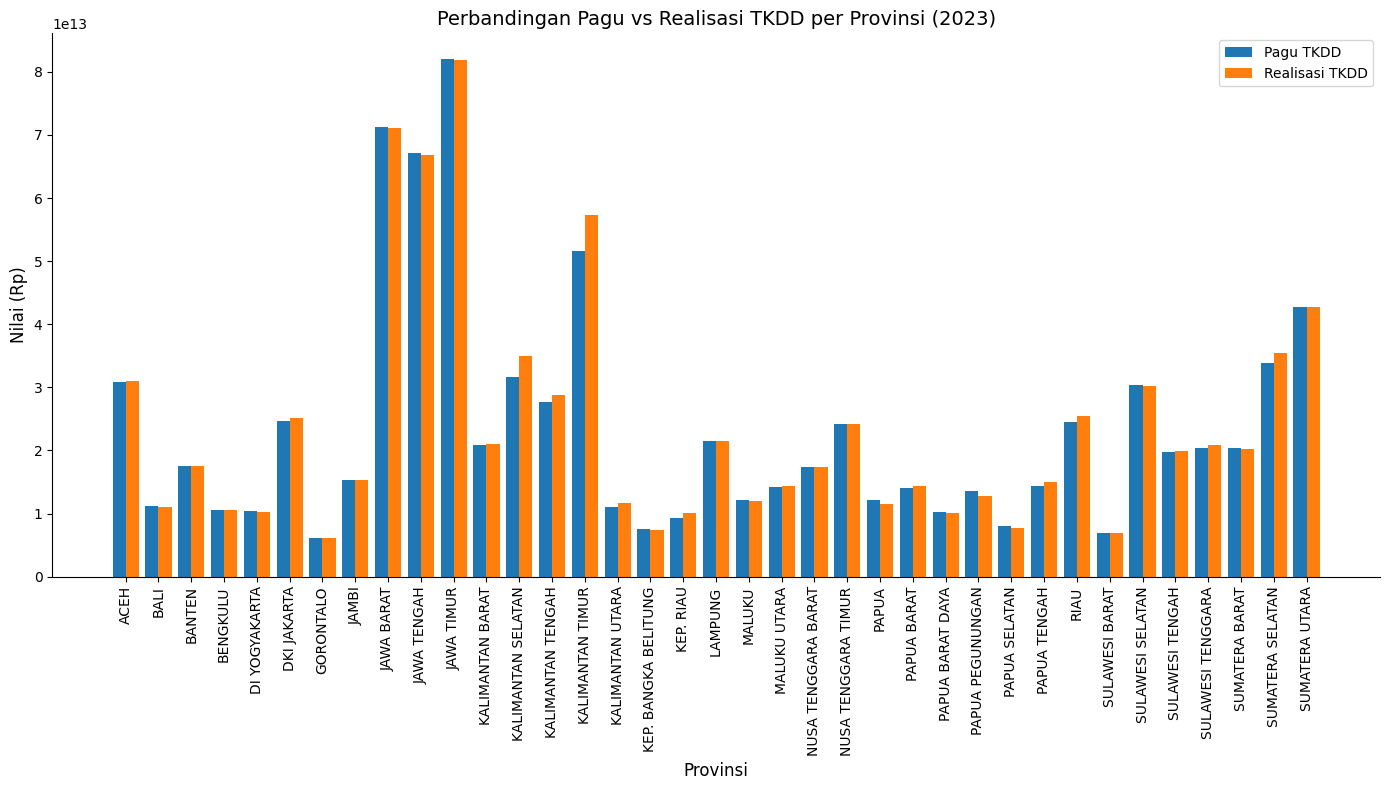

In [17]:
# Bar Chart Pagu vs Realisasi per Provinsi
plt.figure(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(data_clean_tkdd))
plt.bar(index, data_clean_tkdd['Pagu TKDD'], bar_width, label='Pagu TKDD')
plt.bar(index + bar_width, data_clean_tkdd['Realisasi TKDD'], bar_width, label='Realisasi TKDD')

plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Nilai (Rp)', fontsize=12)
plt.title('Perbandingan Pagu vs Realisasi TKDD per Provinsi (2023)', fontsize=14)
plt.xticks(index + bar_width / 2, data_clean_tkdd['Provinsi'], rotation=90)
plt.legend()

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

**Penjelasan:**

Berdasarkan grouped bar chart perbandingan antara Pagu TKDD dan Realisasi TKDD di setiap provinsi di Indonesia tahun 2023, terlihat bahwa sebagian besar provinsi mampu merealisasikan dana TKDD dengan cukup baik, di mana nilai realisasi mendekati atau bahkan sedikit melampaui pagu yang telah ditetapkan. Hal ini mencerminkan efektivitas penyerapan anggaran di banyak daerah, terutama di provinsi-provinsi besar seperti Jawa Barat, Jawa Timur, Jawa Tengah, dan Sumatera Utara yang juga mendapatkan alokasi dana tertinggi. Meskipun demikian, terdapat beberapa provinsi yang menunjukkan selisih cukup besar antara pagu dan realisasi, seperti DKI Jakarta, Kalimantan Selatan, dan beberapa provinsi baru di Papua. Hal ini dapat mengindikasikan adanya kendala dalam serapan anggaran yang mungkin disebabkan oleh kapasitas kelembagaan yang masih terbatas, kondisi geografis yang sulit, atau proses administrasi yang belum optimal. Di sisi lain, adanya provinsi yang realisasinya melebihi pagu, seperti Aceh dan Sumatera Selatan, menunjukkan adanya kemungkinan penyesuaian atau tambahan anggaran di tengah tahun. Secara keseluruhan, hasil ini menegaskan bahwa besarnya pagu tidak selalu berbanding lurus dengan realisasi, sehingga efektivitas penggunaan anggaran tetap menjadi isu penting dalam pemerataan pembangunan di tingkat daerah.

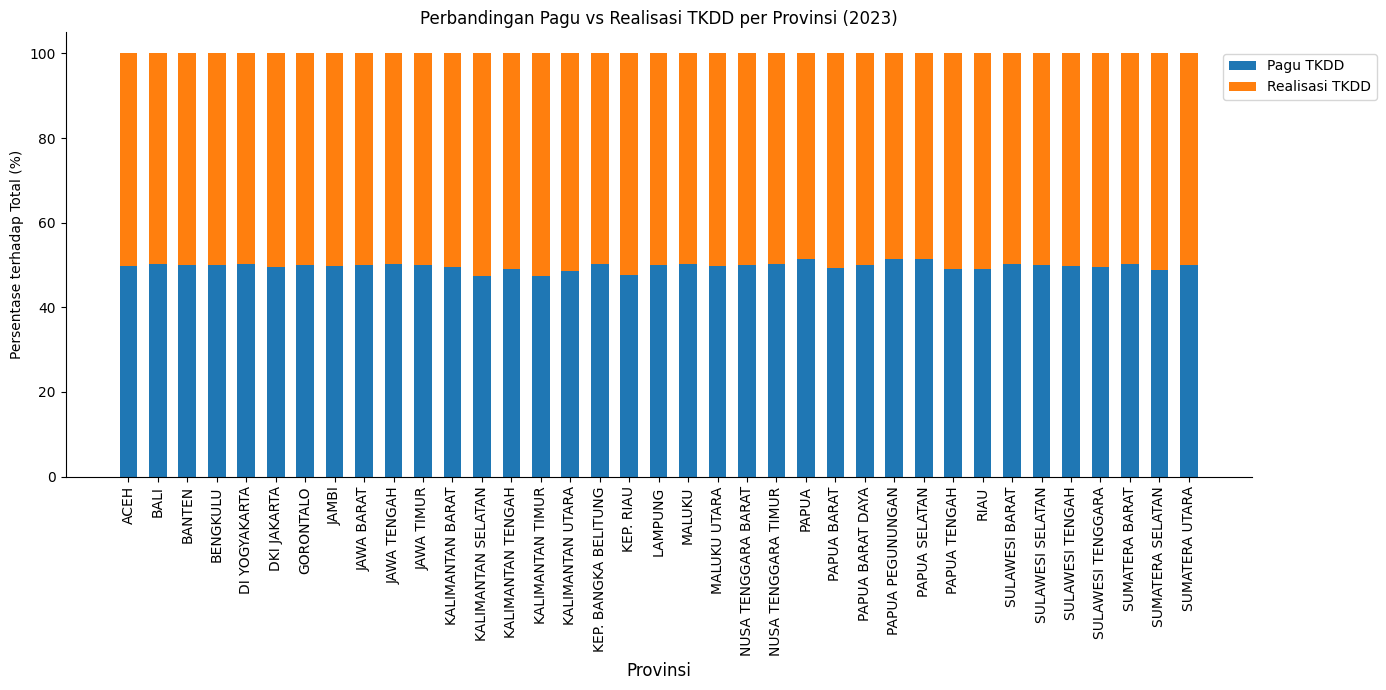

In [18]:
# Hitung proporsi masing-masing terhadap total Pagu + Realisasi
total = data_clean_tkdd['Pagu TKDD'] + data_clean_tkdd['Realisasi TKDD']
data_clean_tkdd['Pagu (%)'] = data_clean_tkdd['Pagu TKDD'] / total * 100
data_clean_tkdd['Realisasi (%)'] = data_clean_tkdd['Realisasi TKDD'] / total * 100

# Buat stacked bar chart 100%
fig, ax = plt.subplots(figsize=(14, 7))
index = np.arange(len(data_clean_tkdd))
bar_width = 0.6

# Bar Pagu (bagian bawah)
ax.bar(index, data_clean_tkdd['Pagu (%)'], bar_width, label='Pagu TKDD')

# Bar Realisasi (ditumpuk di atas Pagu)
ax.bar(index, data_clean_tkdd['Realisasi (%)'], bar_width, bottom=data_clean_tkdd['Pagu (%)'], label='Realisasi TKDD')

# Label dan tampilan
ax.set_xticks(index)
ax.set_xticklabels(data_clean_tkdd['Provinsi'], rotation=90)
ax.set_xlabel('Provinsi', fontsize=12)
ax.set_ylabel('Persentase terhadap Total (%)')
ax.set_title('Perbandingan Pagu vs Realisasi TKDD per Provinsi (2023)')
ax.legend(loc='center left', bbox_to_anchor=(0.97, 0.9))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

**Penjelasan**

Berdasarkan stacked bar chart yang menunjukkan perbandingan persentase Pagu TKDD dan Realisasi TKDD per provinsi tahun 2023, didapatkan gambaran mengenai proporsi serapan anggaran di seluruh provinsi Indonesia. Terlihat bahwa sebagian besar provinsi memiliki rasio realisasi terhadap pagu yang cukup seimbang, dengan proporsi realisasi mendekati atau hanya sedikit di bawah alokasi pagu. Tidak terdapat perbedaan ekstrem antarprovinsi dalam hal proporsi serapan, yang mengindikasikan bahwa secara umum, pemerintah daerah mampu menyerap dana TKDD secara relatif konsisten di berbagai wilayah. Namun, masih terdapat beberapa provinsi yang menunjukkan porsi realisasi yang sedikit lebih rendah dibandingkan pagu, seperti beberapa provinsi di Papua dan Kalimantan, yang bisa jadi disebabkan oleh keterbatasan kapasitas fiskal, hambatan geografis, atau tantangan dalam implementasi program. Sebaliknya, terdapat juga provinsi yang menunjukkan keseimbangan hampir sempurna atau bahkan realisasi yang sedikit lebih tinggi dari pagu, mencerminkan efisiensi atau adanya penyesuaian anggaran. Secara keseluruhan, grafik ini menegaskan bahwa meskipun alokasi anggaran berbeda-beda antarprovinsi, tingkat serapan dana cenderung relatif seragam, namun tetap ada ruang untuk perbaikan di daerah-daerah tertentu guna meningkatkan efektivitas pelaksanaan anggaran.

#### **4.1.2. Kategori Persentase Realisasi TKDD per Provinsi**

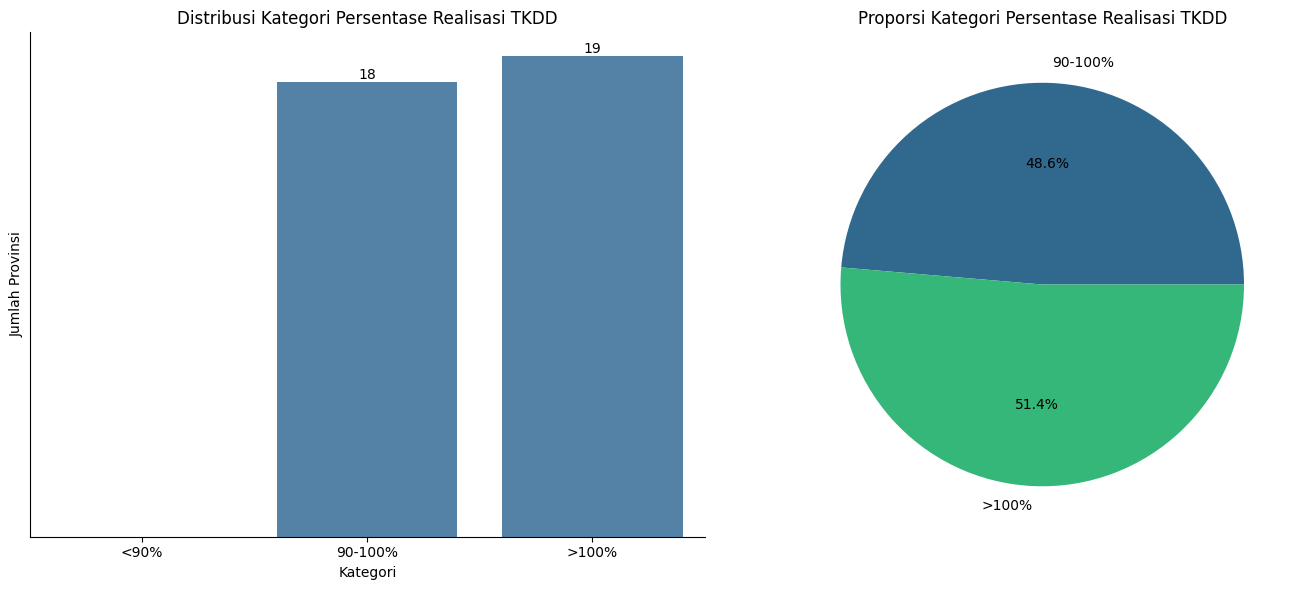

In [19]:
# Siapkan data kategori
kategori_counts = data_clean_tkdd['Kategori Persentase Realisasi TKDD'].value_counts().reindex(['<90%', '90-100%', '>100%'])

# Buat figure dan 2 subplot horizontal
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Subplot kiri: Bar Chart ---
sns_bar = sns.countplot(
    ax=axes[0],
    x='Kategori Persentase Realisasi TKDD',
    data=data_clean_tkdd,
    order=['<90%', '90-100%', '>100%'],
    color='steelblue'
)

axes[0].set_title('Distribusi Kategori Persentase Realisasi TKDD')
axes[0].set_xlabel('Kategori')
axes[0].set_ylabel('Jumlah Provinsi')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_yticks([])

# Tambahkan label angka di atas bar
for p in sns_bar.patches:
    count = int(p.get_height())
    axes[0].annotate(
        f'{count}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Subplot kanan: Pie Chart ---
axes[1].pie(
    kategori_counts.dropna(),  # drop NaN agar pie chart tidak error
    labels=kategori_counts.dropna().index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(kategori_counts.dropna()))
)
axes[1].set_title('Proporsi Kategori Persentase Realisasi TKDD')

# Layout rapi
plt.tight_layout()
plt.show()

**Penjelasan:**

Berdasarkan bar chart distribusi dan pie chart proporsi kategori persentase realisasi TKDD tahun 2023 menunjukkan bahwa tidak ada provinsi yang memiliki tingkat realisasi di bawah 90% dari pagu anggaran yang telah ditetapkan. Sebanyak 18 provinsi (48,6%) masuk dalam kategori realisasi antara 90% hingga 100%, yang mencerminkan tingkat serapan yang cukup baik dan mendekati target alokasi dana. Sementara itu, sebanyak 19 provinsi (51,4%) justru memiliki realisasi yang melebihi 100% dari pagu, yang menunjukkan adanya penyesuaian atau tambahan anggaran yang berhasil dimanfaatkan oleh daerah-daerah tersebut. Temuan ini memperlihatkan bahwa sebagian besar provinsi di Indonesia mampu mengelola dan menyerap dana TKDD secara optimal bahkan melampaui rencana awal, meskipun tetap perlu dicermati apakah penyerapan yang tinggi ini benar-benar berbanding lurus dengan capaian pembangunan yang dihasilkan. Secara keseluruhan, distribusi ini mengindikasikan kinerja penyerapan TKDD yang cukup solid di hampir seluruh provinsi.

Sebagai catatan penting, proporsi ini dihitung dari total 37 provinsi karena terdapat 1 provinsi, yaitu Sulawesi Utara, yang datanya tidak tersedia untuk variabel pagu dan realisasi TKDD. Oleh karena itu, interpretasi ini hanya mencakup provinsi-provinsi dengan data yang lengkap.

#### **4.1.3. Peta Persentase Realisasi TKDD per Provinsi Tahun 2023**

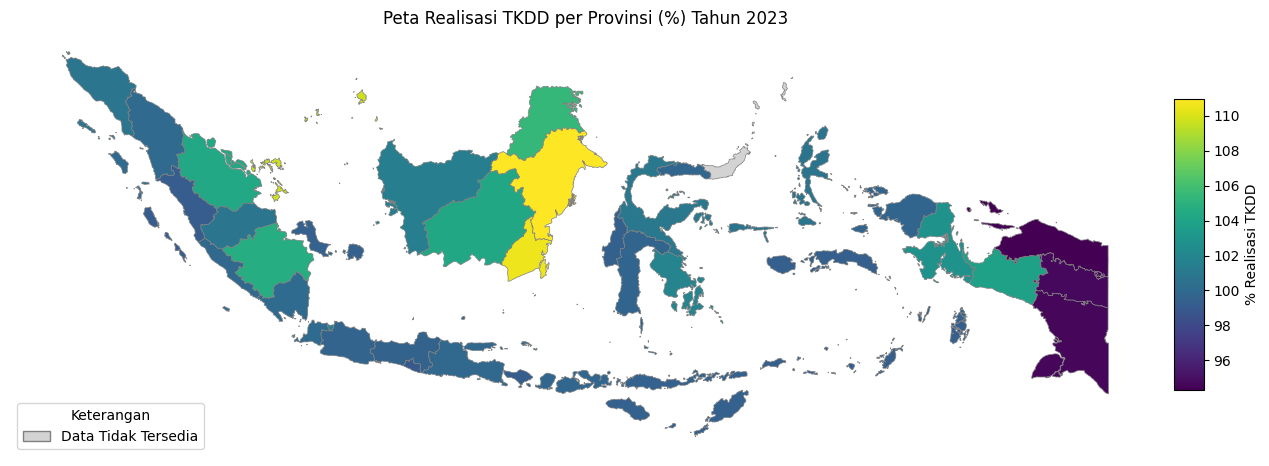

In [20]:
# Load GeoJSON dari https://github.com/ardian28/GeoJson-Indonesia-38-Provinsi sebagai alat bantu visualisasi
url = "https://raw.githubusercontent.com/ardian28/GeoJson-Indonesia-38-Provinsi/refs/heads/main/Provinsi/38%20Provinsi%20Indonesia%20-%20Provinsi.json"
gdf = gpd.read_file(url)
data_tkdd = data_clean_tkdd.copy()

# Normalisasi nama provinsi (karena beda ejaan dengan geojson)
nama_mapping = {
    "DI YOGYAKARTA": "DAERAH ISTIMEWA YOGYAKARTA",
    "KEP. BANGKA BELITUNG": "KEPULAUAN BANGKA BELITUNG",
    "KEP. RIAU": "KEPULAUAN RIAU"
}
data_tkdd["Provinsi"] = data_tkdd["Provinsi"].replace(nama_mapping)

# Buat kolom provinsi bersih untuk merge
data_tkdd["Provinsi_clean"] = data_tkdd["Provinsi"].str.upper().str.strip()
gdf["Provinsi_clean"] = gdf["PROVINSI"].str.upper().str.strip()

# Merge GeoJSON + Data TKDD
merged = gdf.merge(data_tkdd, on="Provinsi_clean", how="left")

# Plotting Peta
fig, ax = plt.subplots(figsize=(14, 10))
merged.plot(
    column='Persentase Realisasi TKDD',
    cmap='viridis',
    linewidth=0.5,
    ax=ax,
    edgecolor='0.5',
    legend=True,
    legend_kwds={
        'label': "% Realisasi TKDD",
        'shrink': 0.3,
        'aspect': 10,
        'orientation': 'vertical',
        'pad': 0.01
    },
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': '0.5',
        'label': 'Data Tidak Tersedia'
    }
)

# Patch tambahan untuk 'Data Tidak Tersedia'
missing_patch = Patch(facecolor='lightgrey', edgecolor='0.5', label='Data Tidak Tersedia')

# Tambahkan legend manual
ax.legend(handles=[missing_patch], loc='lower left', title='Keterangan')

# Tampilan
ax.set_title('Peta Realisasi TKDD per Provinsi (%) Tahun 2023')
ax.axis('off')
plt.tight_layout()
plt.show()

Berdasarkan peta realisasi TKDD per provinsi tahun 2023, terlihat bahwa sebagian besar provinsi di Indonesia memiliki tingkat realisasi TKDD yang cukup tinggi dan mendekati atau bahkan melebihi pagu yang telah ditetapkan. Beberapa provinsi di wilayah Kalimantan, seperti Kalimantan Tengah dan Kalimantan Selatan, menunjukkan realisasi yang sangat tinggi, bahkan melebihi 110% dari pagu anggaran. Hal ini mencerminkan adanya kemampuan atau kebutuhan fiskal yang lebih besar di wilayah tersebut sehingga terjadi tambahan atau optimalisasi anggaran. Di sisi lain, beberapa provinsi di kawasan timur Indonesia, khususnya di Papua, menunjukkan tingkat realisasi yang lebih rendah dibandingkan provinsi lainnya, meskipun sebagian besar tetap berada dalam kisaran di atas 95%. Peta ini juga memperlihatkan adanya satu provinsi, yaitu Sulawesi Utara, yang tidak memiliki data realisasi TKDD, sehingga tidak dapat dimasukkan dalam analisis. Secara umum, peta ini mengindikasikan bahwa mayoritas provinsi mampu memanfaatkan alokasi TKDD dengan baik, namun tetap ada variasi tingkat serapan antarwilayah yang dapat mencerminkan perbedaan kapasitas pelaksanaan, kebutuhan pembangunan, atau kondisi administratif masing-masing provinsi.

#### **4.1.4. Peta Kategori Persentase Realisasi TKDD per Provinsi Tahun 2023**

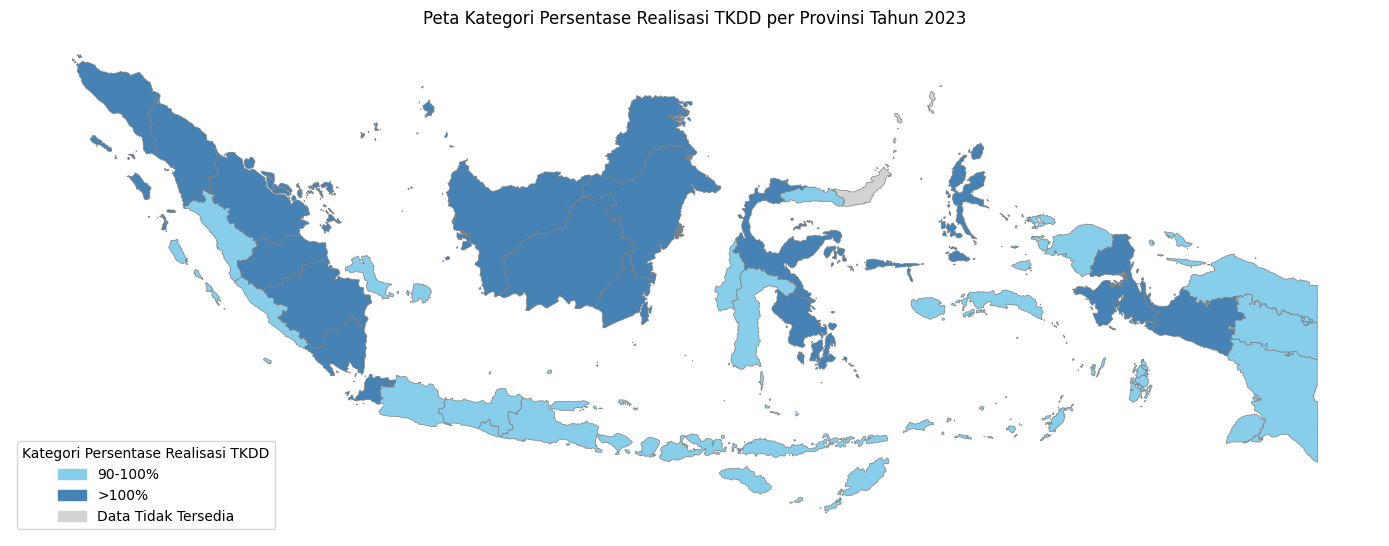

In [21]:
# Merge GeoJSON + Data TKDD
merged2 = gdf.merge(data_tkdd, on="Provinsi_clean", how="left").fillna('Data Tidak Tersedia')

# Asumsi kolom kategori ada di merged2['Kategori Persentase Realisasi TKDD']
kategori_order = ["90-100%", ">100%", "Data Tidak Tersedia"]
warna_kategori = {
    "90-100%": "skyblue",
    ">100%": "steelblue",
    "Data Tidak Tersedia": "lightgrey"
}

fig, ax = plt.subplots(figsize=(14, 10))
merged2.plot(
    column='Kategori Persentase Realisasi TKDD',
    cmap=None,
    color=merged2['Kategori Persentase Realisasi TKDD'].map(warna_kategori),
    linewidth=0.5,
    ax=ax,
    edgecolor='0.5',
    legend=False
)

patches = [mpatches.Patch(color=warna_kategori[k], label=k) for k in kategori_order]
plt.legend(handles=patches, title="Kategori Persentase Realisasi TKDD", loc='lower left')

ax.set_title('Peta Kategori Persentase Realisasi TKDD per Provinsi Tahun 2023')
ax.axis('off')
plt.tight_layout()
plt.show()

Peta kategori persentase realisasi TKDD per provinsi tahun 2023 memperlihatkan sebaran tingkat serapan anggaran di seluruh wilayah Indonesia. Mayoritas provinsi, yang ditandai dengan warna biru gelap, berhasil merealisasikan anggaran TKDD di atas 100% dari pagu yang telah ditetapkan, menunjukkan adanya fleksibilitas anggaran dan kemampuan daerah dalam memanfaatkan tambahan alokasi dana. Sementara itu, beberapa provinsi lainnya yang berwarna biru muda berada dalam kategori realisasi antara 90% hingga 100%, yang tetap mencerminkan kinerja serapan yang cukup baik. Tidak terdapat provinsi dengan realisasi di bawah 90%, sehingga secara umum tingkat realisasi anggaran di seluruh Indonesia menunjukkan performa yang positif. Peta ini juga menunjukkan bahwa realisasi di atas 100% tidak hanya terjadi di provinsi besar seperti Kalimantan dan Sumatera, tetapi juga di beberapa provinsi di kawasan timur Indonesia, termasuk Papua dan Maluku. Namun demikian, terdapat satu provinsi, yaitu Sulawesi Utara, yang ditandai dengan warna abu-abu karena tidak memiliki data realisasi TKDD, sehingga tidak dapat dikategorikan. Secara keseluruhan, peta ini memberikan gambaran bahwa penyerapan anggaran di sebagian besar provinsi berjalan efektif, meskipun perlu tetap diperhatikan faktor-faktor yang mempengaruhi capaian tersebut agar alokasi anggaran benar-benar berdampak pada kesejahteraan masyarakat.

#### **4.1.5. Uji Beda Antara Pagu TKDD dan Realisasi TKDD**

Sebelum melakukan uji beda antara Pagu TKDD dan Realisasi TKDD, langkah awal yang penting dilakukan adalah mengukur apakah data selisih antara keduanya berdistribusi normal atau tidak. Hal ini dilakukan menggunakan Uji Normalitas Shapiro-Wilk, yang secara statistik menguji apakah distribusi data mendekati distribusi normal.

Dari pengujian normalitas:
* Jika data berdistribusi normal, maka uji parametrik seperti Paired t-Test (Uji t Berpasangan) dapat digunakan untuk membandingkan rata-rata kedua kelompok data.
* Namun jika data tidak berdistribusi normal, maka penggunaan uji parametrik akan menghasilkan kesimpulan yang tidak valid. Dalam kasus tersebut, harus digunakan uji non-parametrik yang tidak mensyaratkan asumsi normalitas.

In [22]:
# Uji Normalitas selisih Pagu TKDD dan Realisasi TKDD
selisih = data_clean_tkdd["Pagu TKDD"] - data_clean_tkdd["Realisasi TKDD"]
stat, p_shapiro = shapiro(selisih)

print("\n=== Hasil Uji Normalitas (Shapiro-Wilk)===")
print(f"Statistik uji: {stat:.4f}")
print(f"p-value      : {p_shapiro:.4f}")

if p_shapiro < 0.05:
    print("Keputusan    : Selisih TIDAK berdistribusi normal (p < 0.05).")
else:
    print("Keputusan    : Selisih berdistribusi normal (p ≥ 0.05).")


=== Hasil Uji Normalitas (Shapiro-Wilk)===
Statistik uji: 0.6056
p-value      : 0.0000
Keputusan    : Selisih TIDAK berdistribusi normal (p < 0.05).


Hasil uji menunjukkan statistik sebesar 0,6056 dengan p-value 0,0000, yang berarti selisih antara Pagu dan Realisasi TKDD tidak berdistribusi normal (p < 0,05). Berdasarkan hasil tersebut, dilanjutkan dengan uji non-parametrik yaitu Uji Wilcoxon yang digunakan untuk menguji apakah terdapat perbedaan yang signifikan antara nilai Pagu dan Realisasi TKDD, mengingat data tidak memenuhi asumsi normalitas.

In [23]:
# Uji beda rata-rata 
stat, p_wilcoxon = wilcoxon(data_clean_tkdd["Pagu TKDD"], data_clean_tkdd["Realisasi TKDD"])
print(f"\n=== Hasil Uji Wilcoxon===")
print(f"Statistik uji: {stat:.4f}")
print(f"p-value      : {p_wilcoxon:.4f}")

if p_wilcoxon < 0.05:
    print("Keputusan    : Terdapat perbedaan signifikan antara Pagu dan Realisasi TKDD (p < 0.05).")
else:
    print("Keputusan    : Tidak terdapat perbedaan signifikan antara Pagu dan Realisasi TKDD (p ≥ 0.05).")



=== Hasil Uji Wilcoxon===
Statistik uji: 264.0000
p-value      : 0.1868
Keputusan    : Tidak terdapat perbedaan signifikan antara Pagu dan Realisasi TKDD (p ≥ 0.05).


Hasil Uji Wilcoxon menunjukkan statistik sebesar 264,0000 dengan p-value 0,1917. Karena p-value lebih besar dari 0,05, maka dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan secara statistik antara Pagu dan Realisasi TKDD di tingkat provinsi. Artinya, secara umum besaran dana yang dialokasikan (pagu) berhasil direalisasikan dengan cukup konsisten di seluruh provinsi tanpa adanya perbedaan yang bermakna secara statistik. Temuan ini memperkuat hasil visualisasi sebelumnya yang menunjukkan bahwa sebagian besar provinsi mampu merealisasikan anggarannya mendekati atau bahkan melebihi pagu yang telah ditetapkan. Meskipun demikian, hasil ini tidak serta-merta mencerminkan efektivitas penggunaan dana, sehingga analisis lanjutan tetap diperlukan untuk menilai apakah serapan tersebut berdampak nyata pada pembangunan dan kesejahteraan masyarakat.

### **4.2. Provinsi yang memiliki tingkat realisasi tertinggi dan terendah**

#### **4.2.1. Ranking Persentase Realisasi TKDD per Provinsi Tahun 2023**

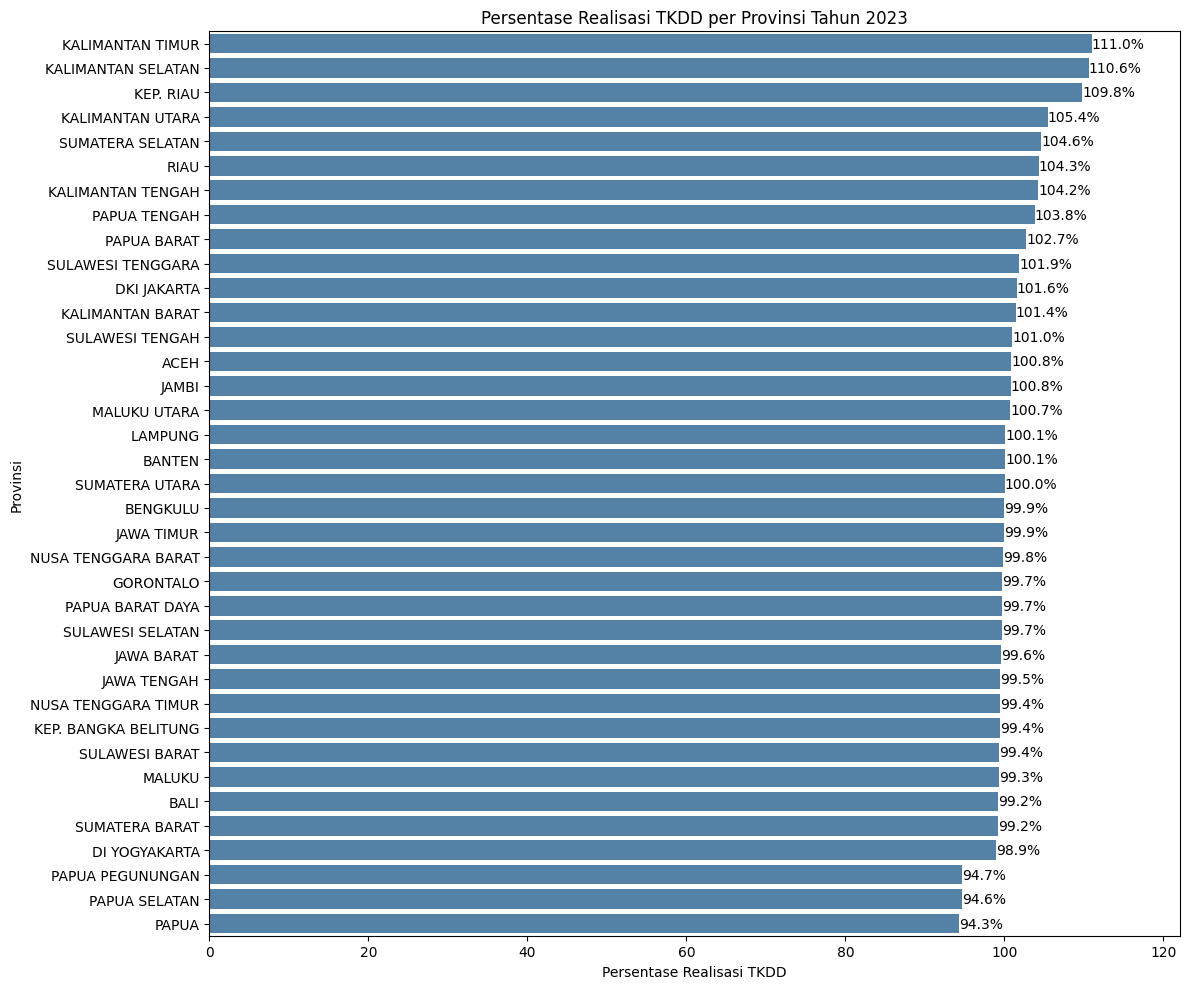

In [24]:
# Urutkan data dari tertinggi ke terendah
df_sorted = data_clean_tkdd.sort_values(by='Persentase Realisasi TKDD', ascending=False).reset_index(drop=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 10))
sns.barplot(
    y='Provinsi',
    x='Persentase Realisasi TKDD',
    data=df_sorted,
    color='steelblue'
)

# Tambahkan anotasi nilai persentase pada setiap bar
for index, row in df_sorted.iterrows():
    plt.text(
        row['Persentase Realisasi TKDD'] + 0.01,  # Sedikit ke kanan dari bar
        index,
        f"{row['Persentase Realisasi TKDD']:.1f}%",
        va='center'
    )

plt.xlabel('Persentase Realisasi TKDD')
plt.ylabel('Provinsi')
plt.title('Persentase Realisasi TKDD per Provinsi Tahun 2023')
plt.xlim(0, max(df_sorted['Persentase Realisasi TKDD'].max() * 1.1, 1))  # Pastikan x limit > 1 kalau ada >100%
plt.tight_layout()
plt.show()


**Penjelasan:**

Berdasarkan visualisasi persentase realisasi TKDD per provinsi tahun 2023, provinsi dengan tingkat realisasi tertinggi adalah Kalimantan Timur yang mencapai 111,0% dari pagu anggaran. Disusul oleh Kalimantan Selatan (110,6%) dan Kepulauan Riau (109,8%). Tingginya tingkat realisasi di provinsi-provinsi ini menunjukkan kemampuan mereka dalam menyerap anggaran secara optimal bahkan melampaui target yang ditetapkan, yang bisa mencerminkan tingginya kebutuhan fiskal atau efisiensi dalam pengelolaan anggaran.

Sementara itu, beberapa provinsi menunjukkan tingkat realisasi yang jauh lebih rendah dibandingkan provinsi lainnya. Provinsi dengan realisasi terendah adalah Papua dengan capaian 94,3%, diikuti oleh Papua Selatan (94,6%) dan Papua Pegunungan (94,7%). Tingkat realisasi yang rendah ini dapat mengindikasikan adanya kendala dalam pelaksanaan program, keterbatasan infrastruktur, atau hambatan administratif yang mempengaruhi serapan anggaran di wilayah-wilayah tersebut.

Menariknya, terdapat juga provinsi yang merealisasikan anggarannya tepat 100% sesuai dengan pagu yang dialokasikan, yaitu Sumatera Utara. Pencapaian ini mencerminkan perencanaan dan pelaksanaan anggaran yang presisi dan stabil, tanpa kelebihan maupun kekurangan dana yang signifikan.

Secara keseluruhan, perbandingan ini menunjukkan bahwa meskipun mayoritas provinsi mampu merealisasikan dana TKDD mendekati atau bahkan melebihi pagu, terdapat variasi antarwilayah yang perlu diperhatikan untuk meningkatkan pemerataan efektivitas serapan anggaran di seluruh Indonesia.

### **4.3. Faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD**

#### **4.3.1 Hubungan antara Masing-Masing Variabel terhadap Realisasi TKDD**

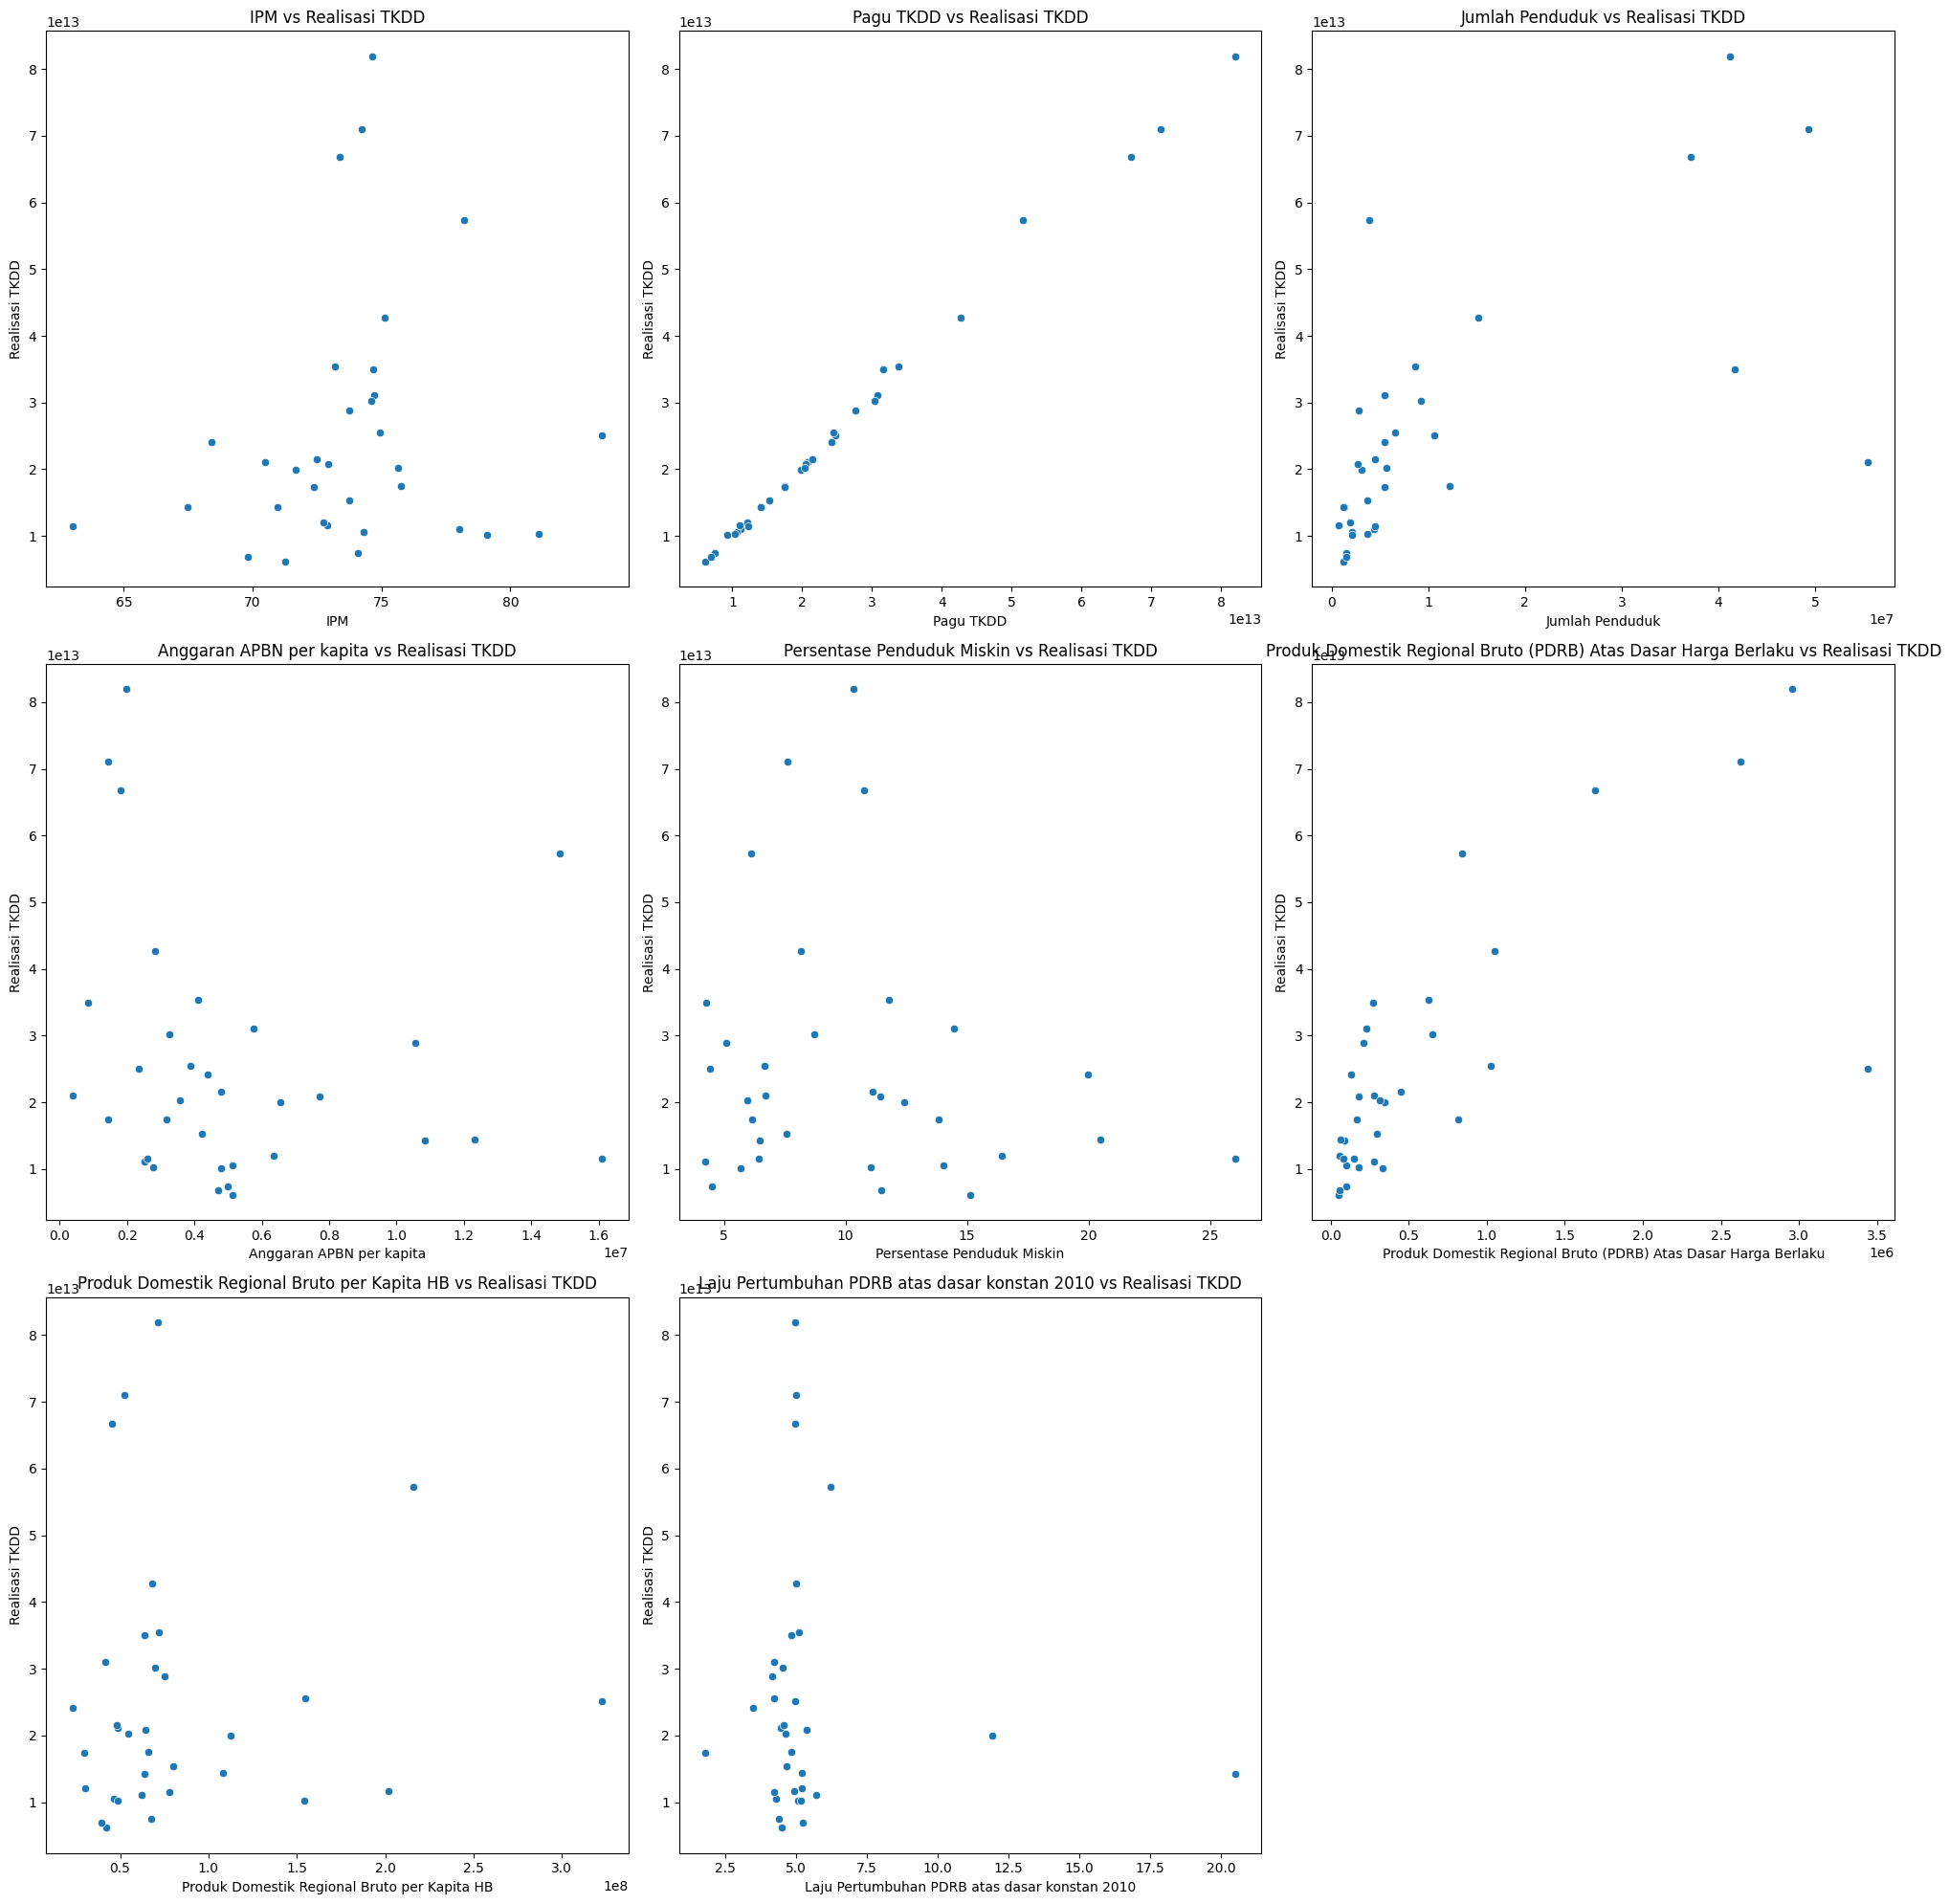

In [25]:
# Daftar variabel independent
variabels = [
    'IPM',
    'Pagu TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

# Ukuran figure
plt.figure(figsize=(20, 20))

# Buat subplot untuk masing-masing variabel
for i, var in enumerate(variabels):
    plt.subplot(3, 3, i+1)  # atur dalam grid 3x3
    sns.scatterplot(data=data_clean_all, x=var, y='Realisasi TKDD')
    plt.title(f'{var} vs Realisasi TKDD')
    plt.xlabel(var)
    plt.ylabel('Realisasi TKDD')

plt.tight_layout()
plt.show()


**Penjelasan :**

**1. IPM vs Realisasi TKDD**<br>
Tidak terlihat pola hubungan linier yang jelas antara Indeks Pembangunan Manusia (IPM) dan Realisasi TKDD. Ini menunjukkan bahwa besarnya realisasi transfer tidak berkaitan langsung dengan tinggi rendahnya IPM suatu daerah.

**2. Pagu TKDD vs Realisasi TKDD**<br>
Terlihat hubungan linier positif yang sangat kuat antara pagu dan realisasi. Artinya, semakin besar pagu TKDD yang direncanakan, semakin besar pula realisasi anggaran TKDD-nya. Ini menunjukkan proses distribusi yang proporsional terhadap alokasi awal.

**3. Jumlah Penduduk vs Realisasi TKDD**<br>
Terdapat kecenderungan bahwa daerah dengan jumlah penduduk lebih besar cenderung menerima realisasi TKDD yang lebih tinggi. Namun, sebaran cukup variatif dan tidak terlalu terpusat.

**4. Anggaran APBN per Kapita vs Realisasi TKDD**<br>
Tidak tampak korelasi yang jelas. Artinya, nilai APBN per kapita tidak serta-merta menentukan tingginya realisasi TKDD. Hal ini bisa mengindikasikan bahwa perhitungan transfer daerah tidak sepenuhnya berbasis per kapita.

**5. Persentase Penduduk Miskin vs Realisasi TKDD**<br>
Tidak terdapat hubungan yang kuat antara persentase kemiskinan dengan realisasi TKDD. Realisasi tetap tersebar di berbagai tingkat kemiskinan, mengindikasikan bahwa penyaluran dana tidak selalu ditentukan oleh tingkat kemiskinan.

**6. Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku vs Realisasi TKDD**<br>
Terdapat kecenderungan bahwa daerah dengan PDRB tinggi memiliki realisasi TKDD yang lebih besar, namun hubungan ini tampak lemah dan menyebar.

**7. PDRB per Kapita HB vs Realisasi TKDD**<br>
Hubungan antara PDRB per kapita dengan realisasi juga tidak kuat. Daerah dengan PDRB per kapita tinggi tidak selalu mendapat realisasi TKDD yang besar, mengindikasikan bahwa kemampuan ekonomi per individu tidak menjadi penentu utama.

**8. Laju Pertumbuhan PDRB (konstan 2010) vs Realisasi TKDD** <br>
Tidak tampak korelasi yang jelas antara pertumbuhan ekonomi dengan realisasi TKDD. Artinya, baik daerah dengan pertumbuhan tinggi maupun rendah bisa mendapatkan realisasi dana yang besar.

#### **4.3.2. Identifikasi Korelasi Setiap Variabel Terhadap Realisasi TKDD**

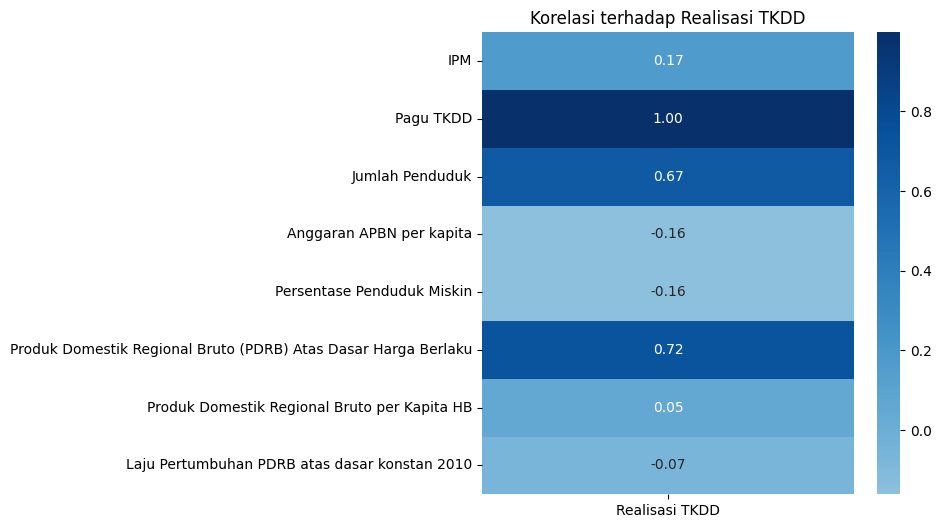

In [26]:
# Daftar variabel untuk dihitung korelasinya
cols = [
    'Realisasi TKDD',
    'IPM',
    'Pagu TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

# Hitung korelasi
corr_matrix = data_clean_all[cols].corr()

# Ambil hanya korelasi terhadap "Realisasi TKDD"
corr_target = corr_matrix[['Realisasi TKDD']].drop('Realisasi TKDD')  # Hapus self-correlation

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_target, annot=True, cmap='Blues', center=0, fmt=".2f")
plt.title('Korelasi terhadap Realisasi TKDD')
plt.show()


**Penjelasan :**

Berdasarkan visualisasi korelasi terhadap Realisasi TKDD, variabel yang menunjukkan hubungan paling kuat adalah Pagu TKDD dengan korelasi sempurna mendekati 1, menegaskan bahwa besarnya alokasi awal berhubungan kuat dengan realisasi anggaran. Selain itu, PDRB atas dasar harga berlaku dan jumlah penduduk juga memiliki korelasi positif yang cukup tinggi yang secara berturut-turut sebesar 0,72 dan 0,67. Hal ini mengindikasikan bahwa kapasitas ekonomi dan jumlah penduduk suatu provinsi memiliki hubungan searah yang cukup kuat dengan realisasi TKDD. Di sisi lain, variabel seperti IPM, PDRB per kapita , dan laju pertumbuhan ekonomi menunjukkan korelasi yang sangat lemah terhadap realisasi TKDD, menandakan bahwa faktor kesejahteraan dan pertumbuhan tidak terlalu berhubungan dalam realisasi TKDD. Variabel seperti persentase penduduk miskin dan APBN per kapita memiliki korelasi negatif yang sangat lemah, yang mengindikasikan bahwa wilayah dengan indikator kemiskinan tinggi justru tidak selalu mendapat realisasi anggaran yang proporsional, atau terdapat mekanisme distribusi lain yang lebih dominan daripada pertimbangan kesejahteraan. 

Analisis korelasi hanya memberikan gambaran awal mengenai arah dan kekuatan hubungan linier antar variabel, namun tidak cukup untuk menyimpulkan adanya pengaruh secara kausal atau signifikan secara statistik. Korelasi juga tidak mempertimbangkan efek bersama dari beberapa variabel terhadap Realisasi TKDD secara simultan. Oleh karena itu, untuk mendapatkan pemahaman yang lebih komprehensif dan mengidentifikasi faktor-faktor yang benar-benar berpengaruh secara signifikan, maka dilakukan analisis lanjutan menggunakan model regresi linier

#### **4.3.3 Pembentukan Model Regresi Realisasi TKDD: Mengetahui Faktor yang Signifikan**

In [ ]:
# Variabel dependen
Y = data_clean_all['Realisasi TKDD']

# Variabel independen
X = data_clean_all[['IPM','Pagu TKDD','Jumlah Penduduk', 
               'Anggaran APBN per kapita', 
               'Persentase Penduduk Miskin',
               'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
               'Produk Domestik Regional Bruto per Kapita HB',
               'Laju Pertumbuhan PDRB atas dasar konstan 2010']]

# Tambahkan konstanta
X = sm.add_constant(X)

# Bentuk model
model = sm.OLS(Y, X).fit()

# Buat DataFrame hasil regresi
params_df = pd.DataFrame({
    'Koefisien': model.params,
    't-statistik': model.tvalues,
    'p-value': model.pvalues
})

# Tambahkan kolom keputusan (alpha = 0.05)
params_df['Keputusan'] = params_df['p-value'].apply(lambda p: 'Signifikan' if p < 0.05 else 'Tidak Signifikan')

In [28]:
params_df

,Koefisien,t-statistik,p-value,Keputusan
const,-5.358485e+08,-3.140665,4.295868e-03,Signifikan
IPM,-9.860275e+09,-1.280254,2.122080e-01,Tidak Signifikan
Pagu TKDD,1.069150e+00,62.597458,5.317579e-29,Signifikan
Jumlah Penduduk,5.493821e+02,0.036786,9.709479e-01,Tidak Signifikan
Anggaran APBN per kapita,-5.411009e+04,-0.818201,4.209732e-01,Tidak Signifikan
Persentase Penduduk Miskin,-5.511628e+10,-2.013895,5.490165e-02,Tidak Signifikan
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,-1.890708e+06,-4.480198,1.433622e-04,Signifikan
Produk Domestik Regional Bruto per Kapita HB,1.868021e+04,4.355250,1.981469e-04,Signifikan
Laju Pertumbuhan PDRB atas dasar konstan 2010,-2.133232e+10,-0.436959,6.658921e-01,Tidak Signifikan


**Penjelasan :**

Berdasarkan hasil regresi linear berganda terhadap Realisasi TKDD, hanya beberapa variabel yang terbukti berpengaruh secara signifikan pada taraf signifikansi 5%. Variabel Pagu TKDD menunjukkan pengaruh paling dominan dengan koefisien positif dan sangat signifikan, menegaskan bahwa alokasi awal anggaran merupakan faktor utama yang menentukan besarnya realisasi TKDD. Hal ini sejalan dengan studi oleh [Kuntadi et al. (2022)](https://doi.org/10.38035/jihhp.v2i3) yang menemukan bahwa pagu anggaran menjadi prediktor utama realisasi anggaran, di mana belanja awal daerah mengikuti pola pagu yang ditetapkan, realisasi cenderung bergerak sejalan dengan pagu tahunannya.

Selain itu, PDRB atas dasar harga berlaku memiliki pengaruh yang signifikan dan berdampak negatif terhadap realisasi TKDD. Artinya, semakin besar total nilai produksi barang dan jasa suatu daerah (tanpa memperhitungkan inflasi), justru semakin rendah realisasi TKDD. Hal ini dapat dijelaskan dengan asumsi bahwa daerah dengan PDRB tinggi dianggap telah memiliki kapasitas fiskal dan ekonomi yang lebih mapan, sehingga pemerintah pusat mengalokasikan dana transfer secara lebih terbatas. 

Sementara itu, PDRB per kapita menunjukkan pengaruh yang signifikan dan berdampak positif terhadap realisasi TKDD. Ini mengindikasikan bahwa semakin tinggi nilai produksi ekonomi rata-rata per individu di suatu daerah, maka realisasi dana transfer ke daerah tersebut cenderung lebih besar. Hal ini bisa mencerminkan bahwa daerah dengan produktivitas per kapita yang tinggi memiliki kapasitas administratif yang lebih baik dalam menyerap dan merealisasikan anggaran. Selain itu, meskipun daerah tersebut tergolong mampu secara ekonomi, pemerintah pusat tetap menyalurkan dana sebagai bentuk dukungan terhadap daerah yang menunjukkan efisiensi dan kinerja ekonomi per individu yang tinggi.

Sebaliknya, variabel-variabel seperti Indeks Pembangunan Manusia (IPM), jumlah penduduk, anggaran APBN per kapita, dan laju pertumbuhan ekonomi tidak menunjukkan pengaruh yang signifikan terhadap realisasi TKDD pada taraf signifikansi 5%. Artinya, perubahan dalam variabel-variabel tersebut tidak secara konsisten berkaitan dengan perubahan realisasi anggaran. Sementara itu, persentase penduduk miskin memiliki nilai p-value yang mendekati batas signifikansi (sekitar 0,055), mengindikasikan adanya kecenderungan pengaruh negatif, meskipun belum cukup kuat untuk dinyatakan signifikan secara statistik pada taraf 5%.

Berdasarkan faktor yang signifikan dapat diperoleh interpretasi sebagai berikut.

1. Peningkatan 1 rupiah pada variabel Pagu TKDD dapat meningkatkan Realisasi TKDD sebesar 1,069 rupiah. Selain itu Pagu TKDD menunjukkan hubungan linier yang sangat kuat terhadap Realisasi TKDD karena realisasi umumnya mengikuti alokasi.

2. Peningkatan 1 miliar rupiah pada variabel PDRB Atas Dasar Harga Berlaku dapat menurunkan Realisasi TKDD sebesar 1.890.709 rupiah. Hal ini bisa disebabkan daerah dengan PDRB tinggi mungkin sudah memiliki sumber daya mandiri atau diklasifikasikan sebagai daerah maju sehingga menerima alokasi TKDD lebih rendah sesuai prinsip kesetaraan.

3. Peningkatan 1 rupiah pada variabel PDRB Per Kapita HB dapat meningkatkan realisasi TKDD sebesar 18.680 rupiah. Ini mungkin menggambarkan bahwa meskipun produksinya besar, pemerintah tetap memberikan alokasi dasar kepada daerah mampu, sehingga secara marginal peningkatan satuan produktivitas per kapita menambah dana, meski efeknya terbatas.

In [29]:
# Uji simultan (uji F)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
f_keputusan = 'Signifikan' if f_pvalue < 0.05 else 'Tidak Signifikan'

# Tampilkan hasil uji simultan
print("\n=== Hasil Uji Simultan (F-statistik) ===")
print(f"F-statistik : {f_stat:.4f}")
print(f"p-value     : {f_pvalue:.4f}")
print(f"Keputusan   : {f_keputusan}")


=== Hasil Uji Simultan (F-statistik) ===
F-statistik : 2738.3668
p-value     : 0.0000
Keputusan   : Signifikan


**Penjelasan :**

Berdasarkan hasil uji simultan model regresi, diperoleh nilai Statistik F = 2738,37 dengan p-value = 0,0000. Karena nilai p-value jauh lebih kecil dari taraf signifikansi 5% (α = 0,05), maka dapat disimpulkan bahwa model regresi secara keseluruhan signifikan secara statistik. Hal ini berarti paling tidak terdapat satu variabel independen dalam model yang berpengaruh secara signifikan terhadap Realisasi TKDD. Dengan demikian, model regresi yang digunakan layak untuk menjelaskan variasi dalam realisasi TKDD berdasarkan kombinasi dari variabel-variabel independen yang dimasukkan. Hasil ini memperkuat keandalan model dalam menganalisis faktor-faktor yang memengaruhi realisasi TKDD.

### **4.4. Hubungan antara realisasi TKDD dan IPM pada provinsi-provinsi di Indonesia**

#### **4.4.1. Identifikasi Hubungan antara Realisasi TKDD dengan IPM**

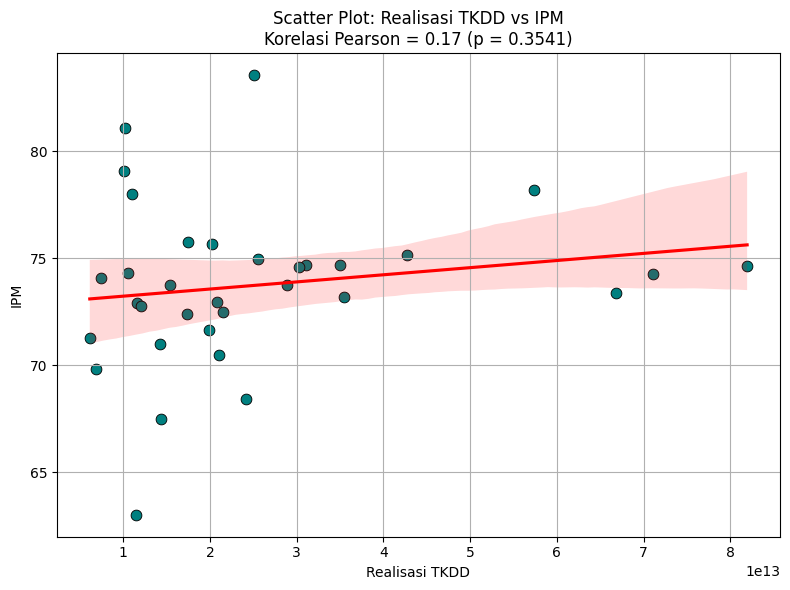

In [30]:
# Hitung korelasi Pearson
corr, pval = pearsonr(data_clean_all['Realisasi TKDD'], data_clean_all['IPM'])

# Buat plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_clean_all, x='Realisasi TKDD', y='IPM', color='teal', s=60, edgecolor='black')

# Tambahkan garis regresi (opsional)
sns.regplot(data=data_clean_all, x='Realisasi TKDD', y='IPM', scatter=False, color='red')

# Judul dengan korelasi
plt.title(f'Scatter Plot: Realisasi TKDD vs IPM\nKorelasi Pearson = {corr:.2f} (p = {pval:.4f})')
plt.xlabel('Realisasi TKDD')
plt.ylabel('IPM')
plt.grid(True)
plt.tight_layout()
plt.show()


**Penjelasan :**

Berdasarkan scatter plot antara Realisasi TKDD dan Indeks Pembangunan Manusia (IPM), terlihat bahwa hubungan keduanya bersifat lemah dan tidak signifikan secara statistik. Nilai koefisien korelasi Pearson sebesar 0,17 menunjukkan adanya hubungan positif yang sangat lemah, di mana kenaikan Realisasi TKDD cenderung diikuti oleh kenaikan IPM, namun hubungan ini tidak cukup kuat atau konsisten. Hal ini diperkuat oleh nilai p-value sebesar 0,3541, yang jauh di atas taraf signifikansi 5%, sehingga belum dapat menyimpulkan adanya korelasi yang signifikan antara kedua variabel tersebut.

Secara visual, penyebaran titik data tampak cukup menyebar tanpa pola linier yang jelas, meskipun garis regresi menunjukkan kecenderungan naik. Area bayangan merah yang cukup lebar juga menunjukkan tingkat ketidakpastian yang tinggi dalam prediksi. Dengan demikian, Realisasi TKDD bukanlah prediktor yang kuat terhadap besarnya IPM, dan kemungkinan besar realisasi TKDD tidak menjamin tingkat kualitas SDM (yang dilihat dari besaran IPM).

#### **4.4.2 Uji Independensi Kategori IPM dan Kategori Persentase Realisasi TKDD**

In [31]:
# 1. Tentukan urutan kategori IPM
urutan_ipm = ["Sangat Tinggi", "Tinggi", "Sedang"]
data_clean_all['Kategori IPM'] = pd.Categorical(data_clean_all['Kategori IPM'], categories=urutan_ipm, ordered=True)

# 2. Buat tabel kontingensi
kontingensi = pd.crosstab(data_clean_all['Kategori IPM'], data_clean_all['Kategori Persentase Realisasi TKDD'])

# 3. Lakukan uji chi-square
chi2, p, dof, expected = stats.chi2_contingency(kontingensi)

# 4. Cetak hasil
print("=== Tabel Kontingensi ===")
print(kontingensi)

print("\n=== Hasil Uji Chi-Square ===")
print(f"Chi-Square Statistic : {chi2:.4f}")
print(f"Degrees of Freedom   : {dof}")
print(f"P-Value              : {p:.4f}")

# 5. Keputusan
alpha = 0.05
if p < alpha:
    print("\n>>> Keputusan: Tolak H0 (Terdapat hubungan antara Kategori IPM dan Kategori Persentase Realisasi TKDD)")
else:
    print("\n>>> Keputusan: Gagal tolak H0 (Tidak terdapat hubungan antara Kategori IPM dan Kategori Persentase Realisasi TKDD)")


=== Tabel Kontingensi ===
Kategori Persentase Realisasi TKDD  90-100%  >100%
Kategori IPM                                      
Sangat Tinggi                             1      1
Tinggi                                   11     16
Sedang                                    3      1

=== Hasil Uji Chi-Square ===
Chi-Square Statistic : 1.6670
Degrees of Freedom   : 2
P-Value              : 0.4345

>>> Keputusan: Gagal tolak H0 (Tidak terdapat hubungan antara Kategori IPM dan Kategori Persentase Realisasi TKDD)


**Penjelasan :**

Berdasarkan hasil analisis tabel kontingensi dan uji Chi-Square, diperoleh bahwa tidak terdapat hubungan yang signifikan antara kategori Indeks Pembangunan Manusia (IPM) dan kategori persentase realisasi TKDD pada taraf signifikansi 5%. Hal ini ditunjukkan oleh nilai p-value sebesar 0,4345, yang jauh lebih besar dari batas 5%, serta keputusan uji yang menyatakan gagal menolak H₀. Dengan demikian, dapat disimpulkan bahwa tingkat realisasi TKDD suatu daerah tidak berpengaruh secara signifikan terhadap kecenderungan tingkat kualitas SDM (kategori IPM). Hal ini menunjukkan bahwa realisasi dana transfer pusat ke daerah belum berpengaruh secara langsung terhadap aspek pembangunan manusia, atau bahwa faktor-faktor lain di luar realisasi TKDD lebih dominan dalam memengaruhi kualitas SDM (kategori IPM).

### **4.5. Faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023**

#### **4.5.1 Hubungan antara Masing-Masing Variabel terhadap IPM**

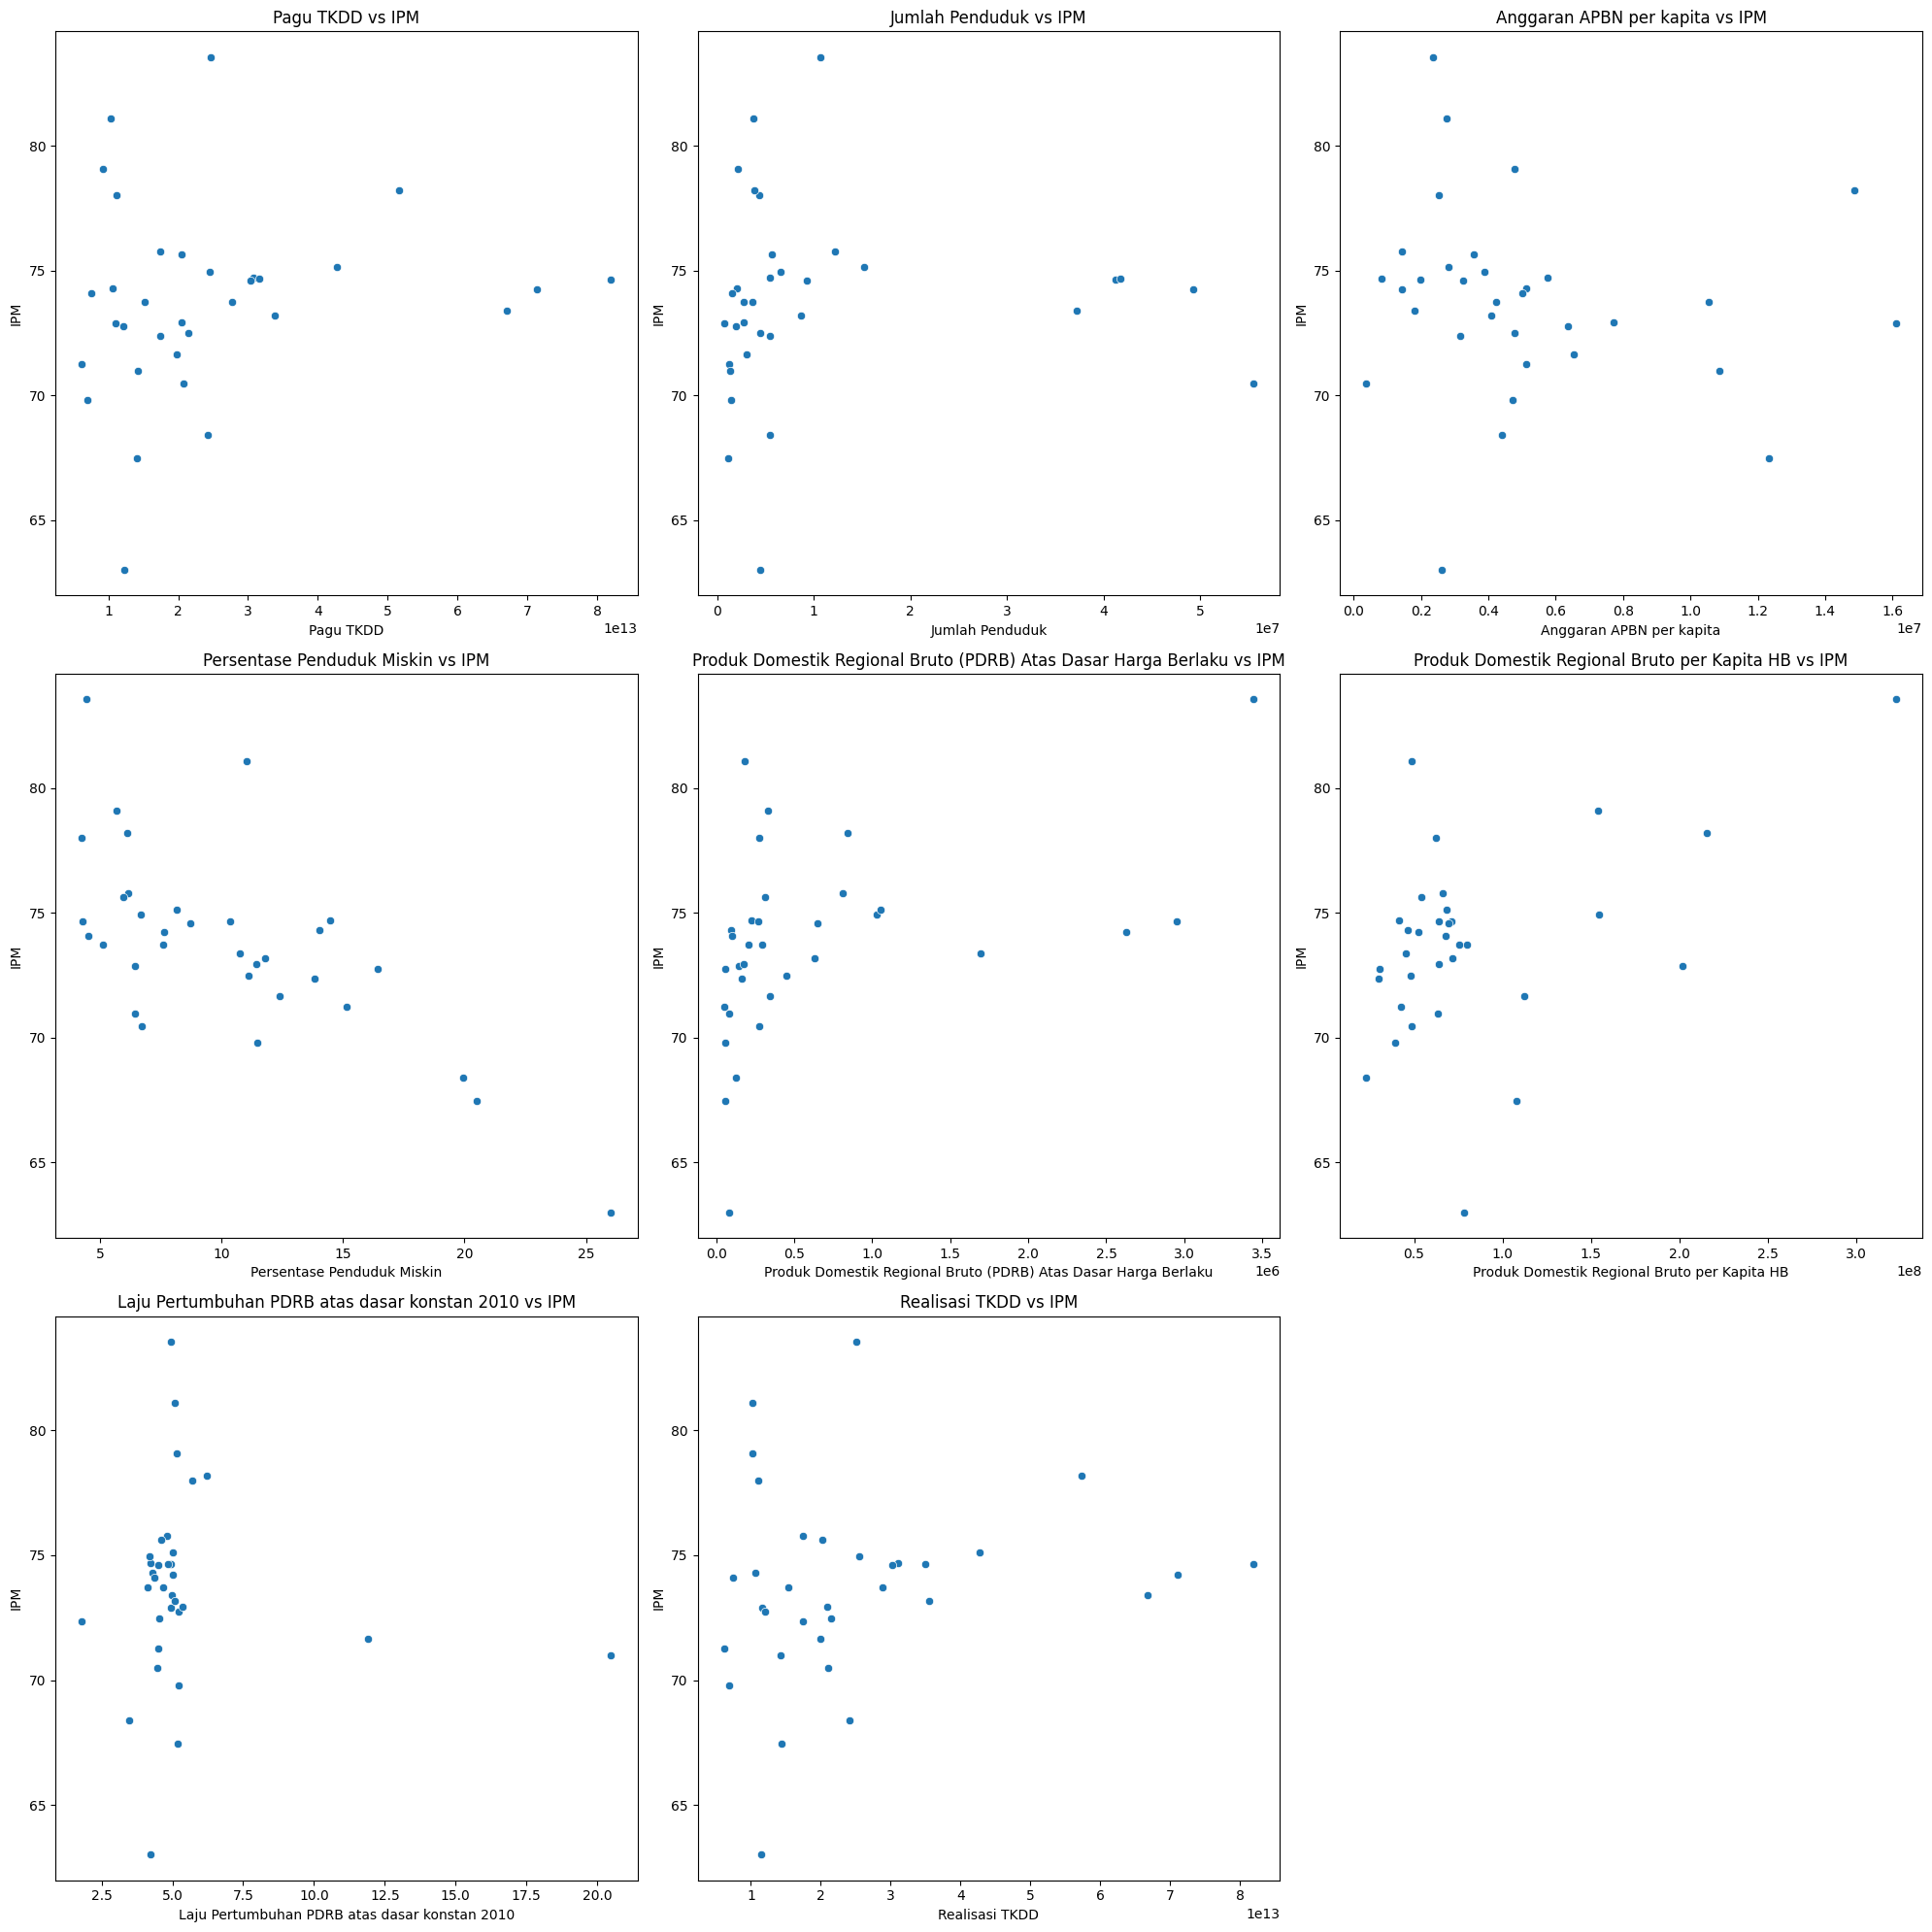

In [32]:
# Daftar variabel independent, kecuali IPM karena sekarang jadi variabel dependen
variabels = [
    'Pagu TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010',
    'Realisasi TKDD'
]

# Ukuran figure
plt.figure(figsize=(20, 20))

# Buat subplot untuk masing-masing variabel terhadap IPM
for i, var in enumerate(variabels):
    plt.subplot(3, 3, i+1)  # atur dalam grid 3x3
    sns.scatterplot(data=data_clean_all, x=var, y='IPM')
    plt.title(f'{var} vs IPM')
    plt.xlabel(var)
    plt.ylabel('IPM')

plt.tight_layout()
plt.show()


**Penjelasan :**

1. **Pagu TKDD vs IPM**<br>
Tidak terlihat hubungan yang jelas antara besarnya pagu TKDD dengan IPM. Sebaran data acak menunjukkan bahwa alokasi dana belum tentu berbanding lurus dengan kualitas pembangunan manusia.

2. **Jumlah Penduduk vs IPM**<br>
Tidak terdapat pola hubungan yang konsisten antara jumlah penduduk dan IPM. Provinsi dengan penduduk besar bisa memiliki IPM tinggi maupun rendah, menunjukkan faktor lain lebih dominan.

3. **Anggaran APBN per Kapita vs IPM**<br>
Terdapat kecenderungan positif, di mana provinsi dengan anggaran APBN per kapita yang lebih tinggi cenderung memiliki IPM yang lebih baik, meskipun hubungan tidak terlalu kuat.

4. **Persentase Penduduk Miskin vs IPM**<br>
Menunjukkan hubungan negatif yang cukup jelas. Semakin tinggi persentase penduduk miskin, IPM cenderung lebih rendah, menegaskan bahwa kemiskinan berdampak langsung terhadap kualitas hidup.

5. **Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku vs IPM**<br>
Terdapat kecenderungan hubungan positif, meskipun dengan penyebaran yang cukup lebar. Daerah dengan ekonomi yang besar cenderung memiliki IPM lebih tinggi.

6. **Produk Domestik Regional Bruto per Kapita HB vs IPM**<br>
Hubungan positif terlihat cukup kuat. Semakin tinggi PDRB per kapita, semakin tinggi pula IPM, menunjukkan kesejahteraan ekonomi individu sangat berkaitan dengan kualitas pembangunan manusia.

7. **Laju Pertumbuhan PDRB atas dasar konstan 2010 vs IPM**<br>
Tidak menunjukkan pola yang jelas. Meskipun pertumbuhan ekonomi tinggi, tidak selalu diikuti oleh peningkatan IPM secara langsung.

8. **Realisasi TKDD vs IPM**<br>
Sebaran data cukup acak dan tidak menunjukkan korelasi yang kuat. Besarnya realisasi dana transfer ke daerah tidak selalu berkaitan dengan pencapaian IPM yang lebih baik.

#### **4.5.2 Identifikasi Korelasi Setiap Variabel terhadap IPM**

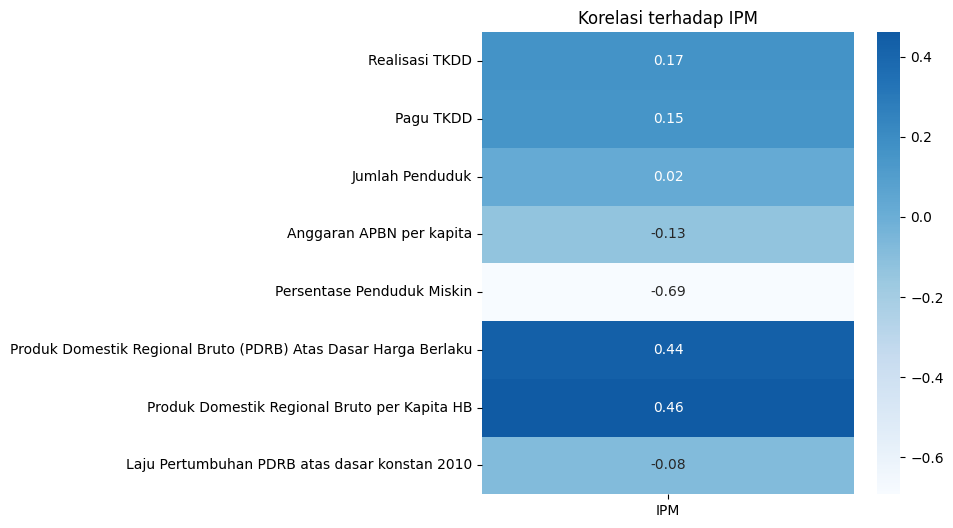

In [33]:
# Daftar variabel untuk dihitung korelasinya
cols = [
    'Realisasi TKDD',
    'IPM',
    'Pagu TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

# Hitung korelasi
corr_matrix = data_clean_all[cols].corr()

# Ambil hanya korelasi terhadap "IPM"
corr_target = corr_matrix[['IPM']].drop('IPM')  # Hapus self-correlation

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_target, annot=True, cmap='Blues', center=0, fmt=".2f")
plt.title('Korelasi terhadap IPM')
plt.show()


**Penjelasan:**

Berdasarkan visualisasi korelasi setiap variabel terhadap IPM, variabel yang menunjukkan hubungan paling kuat adalah Produk Domestik Regional Bruto (PDRB) per Kapita Harga Berlaku dengan nilai korelasi sebesar 0.46, diikuti oleh PDRB Atas Dasar Harga Berlaku sebesar 0.44. Hal ini mengindikasikan bahwa tingkat output ekonomi, khususnya dalam hal pendapatan per kapita, memiliki hubungan yang sedang dengan kualitas pembangunan manusia. Sebaliknya, Persentase Penduduk Miskin menunjukkan korelasi negatif yang paling kuat terhadap IPM, yaitu sebesar -0.69, menegaskan bahwa tingkat kemiskinan di suatu provinsi, memiliki hubungan negatif yang lemah dengan nilai IPM-nya. Korelasi negatif ini menjadi salah satu bukti bahwa kemiskinan masih menjadi faktor penghambat utama dalam pembangunan manusia.

Variabel lain seperti Realisasi TKDD dan Pagu TKDD memiliki korelasi positif yang cukup lemah, masing-masing sebesar 0.17 dan 0.15, yang menunjukkan bahwa TKDD tidak secara langsung berhubungan dengan peningkatan IPM. Begitu pula dengan Jumlah Penduduk dan Laju Pertumbuhan PDRB Konstan 2010 yang menunjukkan hubungan yang sangat lemah. Kondisi sedikit berbeda ditunjukkan oleh variabel Anggaran APBN per Kapita yang memiliki korelasi negatif sebesar -0.13. Hal ini mengindikasikan bahwa besarnya anggaran per orang belum tentu sejalan dengan peningkatan IPM, atau terdapat faktor distribusi dan efisiensi anggaran yang perlu ditelaah lebih lanjut.

Analisis korelasi hanya memberikan gambaran awal mengenai arah dan kekuatan hubungan linier antar variabel, namun tidak cukup untuk menyimpulkan adanya pengaruh secara kausal atau signifikan secara statistik. Korelasi juga tidak mempertimbangkan efek bersama dari beberapa variabel terhadap IPM secara simultan. Oleh karena itu, untuk mendapatkan pemahaman yang lebih komprehensif dan mengidentifikasi faktor-faktor yang benar-benar berpengaruh secara signifikan, maka dilakukan analisis lanjutan menggunakan model regresi linier

#### **4.5.3 Pembentukan Model Regresi IPM: Mengetahui Faktor yang Signifikan**

In [34]:
# Variabel dependen
Y = data_clean_all['IPM']

# Variabel independen
X = data_clean_all[['Realisasi TKDD', 'Pagu TKDD', 'Jumlah Penduduk', 
               'Anggaran APBN per kapita', 
               'Persentase Penduduk Miskin',
               'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
               'Produk Domestik Regional Bruto per Kapita HB',
               'Laju Pertumbuhan PDRB atas dasar konstan 2010']]

# Tambahkan konstanta
X = sm.add_constant(X)

# Bentuk model
model = sm.OLS(Y, X).fit()

# Buat DataFrame hasil regresi
params_df = pd.DataFrame({
    'Koefisien': model.params,
    't-statistik': model.tvalues,
    'p-value': model.pvalues
})

# Tambahkan kolom keputusan (alpha = 0.05)
params_df['Keputusan'] = params_df['p-value'].apply(lambda p: 'Signifikan' if p < 0.05 else 'Tidak Signifikan')

In [35]:
params_df

,Koefisien,t-statistik,p-value,Keputusan
const,8.085812e+01,42.074928,5.318696e-24,Signifikan
Realisasi TKDD,8.121890e-13,1.355372,1.879185e-01,Tidak Signifikan
Pagu TKDD,-8.317049e-13,-1.293599,2.081161e-01,Tidak Signifikan
Jumlah Penduduk,-1.283883e-07,-2.850692,8.823100e-03,Signifikan
Anggaran APBN per kapita,-2.521128e-07,-1.272171,2.155011e-01,Tidak Signifikan
Persentase Penduduk Miskin,-4.541887e-01,-4.850026,6.081539e-05,Signifikan
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,2.447488e-06,1.434669,1.642850e-01,Tidak Signifikan
Produk Domestik Regional Bruto per Kapita HB,-4.602036e-09,-0.270977,7.887259e-01,Tidak Signifikan
Laju Pertumbuhan PDRB atas dasar konstan 2010,-1.508559e-01,-1.024077,3.160108e-01,Tidak Signifikan


**Penjelasan :**

Berdasarkan hasil regresi linear berganda terhadap Indeks Pembangunan Manusia (IPM), hanya beberapa variabel yang menunjukkan pengaruh signifikan pada taraf signifikansi 5%. Variabel yang signifikan adalah Jumlah Penduduk dan Persentase Penduduk Miskin. Variabel yang paling signifikan adalah Persentase Penduduk Miskin, dengan p-value sebesar 0,00006 dan koefisien negatif. Hal ini menunjukkan bahwa peningkatan tingkat kemiskinan berdampak signifikan dalam menurunkan IPM suatu daerah. Temuan ini sejalan dengan studi oleh [Selvira Aryani et al. (2024)](https://doi.org/10.61132/jbep.v1i2.118) yang menunjukkan bahwa persentase penduduk miskin memiliki pengaruh negatif dan signifikan terhadap IPM di Indonesia, sehingga penurunan kemiskinan menjadi variabel kunci dalam mendorong pembangunan manusia.

Selain itu, variabel Jumlah Penduduk juga berpengaruh signifikan dengan p-value 0,0088 dan koefisien negatif. Artinya, provinsi dengan jumlah penduduk yang lebih besar cenderung memiliki IPM yang lebih rendah. Hal ini dapat mengindikasikan bahwa tingginya jumlah penduduk berpotensi menimbulkan tantangan dalam penyediaan layanan dasar seperti pendidikan, kesehatan, dan infrastruktur, sehingga dapat menahan laju peningkatan IPM. Temuan ini juga sejalan dengan studi oleh [Putera (2024)](https://doi.org/10.5281/zenodo.14043034), yang menunjukkan bahwa jumlah penduduk berdampak negatif dan signifikan terhadap Indeks Pembangunan Manusia dan menegaskan temuan bahwa peningkatan populasi tanpa dukungan infrastruktur dan layanan publik dapat menurunkan kualitas pembangunan manusia.

Sementara itu, variabel-variabel seperti Realisasi TKDD, Pagu TKDD, Anggaran APBN per Kapita, PDRB Atas Dasar Harga Berlaku, PDRB per Kapita HB, dan Laju Pertumbuhan PDRB tidak menunjukkan pengaruh yang signifikan terhadap IPM pada taraf signifikansi 5%. Ini mengindikasikan bahwa besarnya alokasi anggaran, realisasi dana transfer, maupun pertumbuhan ekonomi tidak serta-merta meningkatkan kesejahteraan masyarakat jika tidak diiringi dengan efektivitas distribusi manfaat dan pemerataan pembangunan. Hasil ini menegaskan bahwa kualitas dan ketepatan sasaran penggunaan anggaran lebih penting daripada sekadar besaran dana yang dialokasikan.

Berdasarkan variabel-variabel yang signifikan, dapat diperoleh interpretasi sebagai berikut:

1. Peningkatan 1% pada variabel Persentase Penduduk Miskin berpotensi menurunkan IPM sebesar 0,454. Hal ini menunjukkan bahwa pengentasan kemiskinan tetap menjadi strategi paling efektif dalam mendorong pembangunan manusia yang berkelanjutan.

2. Peningkatan 1 orang pada variabel jumlah penduduk akan menurunkan IPM sebesar 0.000000128, menandakan perlunya upaya pemerataan pembangunan agar peningkatan populasi tidak justru memperburuk kualitas hidup masyarakat.

In [36]:
# Uji simultan (uji F)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
f_keputusan = 'Signifikan' if f_pvalue < 0.05 else 'Tidak Signifikan'

# Tampilkan hasil uji simultan
print("\n=== Hasil Uji Simultan (F-statistik) ===")
print(f"F-statistik : {f_stat:.4f}")
print(f"p-value     : {f_pvalue:.4f}")
print(f"Keputusan   : {f_keputusan}")


=== Hasil Uji Simultan (F-statistik) ===
F-statistik : 7.8877
p-value     : 0.0000
Keputusan   : Signifikan


**Penjelasan :**

Berdasarkan hasil uji simultan, diperoleh nilai Statistik F = 7,8877 dengan p-value = 0,0000. Karena p-value jauh lebih kecil dari taraf signifikansi 5%, maka dapat disimpulkan bahwa model regresi secara keseluruhan signifikan secara statistik. Hal ini berarti, paling tidak terdapat satu variabel independen yang secara bersama-sama memiliki pengaruh signifikan terhadap variabel dependen, yaitu Indeks Pembangunan Manusia (IPM). Dengan demikian, model regresi yang digunakan layak untuk menjelaskan variasi IPM berdasarkan kombinasi variabel-variabel ekonomi dan sosial yang dimasukkan ke dalam model. Hasil ini menunjukkan bahwa model memiliki kekuatan penjelas yang valid untuk digunakan dalam analisis lebih lanjut.

## **5. Penutup**

### **5.1. Kesimpulan**

Berdasarkan hasil analisis, berikut merupakan kesimpulan yang dapat menjawab pertanyaan penelitian:

1. Tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023 menunjukkan bahwa sebagian besar provinsi mampu merealisasikan anggaran TKDD dengan baik, dengan realisasi yang mendekati atau bahkan melebihi pagu yang telah ditetapkan. Hasil uji statistik Wilcoxon juga menunjukkan bahwa tidak terdapat perbedaan yang signifikan antara nilai pagu dan realisasi, sehingga secara keseluruhan serapan anggaran TKDD di berbagai provinsi berjalan konsisten dan relatif sesuai dengan alokasi yang direncanakan.

2. Provinsi dengan tingkat realisasi TKDD tertinggi adalah Kalimantan Timur, dengan capaian sebesar 111,0% dari pagu anggaran yang telah ditetapkan. Disusul oleh Kalimantan Selatan (110,6%) dan Kepulauan Riau (109,8%). Sementara itu, provinsi dengan tingkat realisasi terendah adalah Papua, yang hanya mampu merealisasikan 94,3% dari pagu yang tersedia. Selain Papua, provinsi lain di wilayah timur seperti Papua Selatan dan Papua Pegunungan juga menunjukkan tingkat realisasi yang relatif rendah di bawah 95%. Terdapat juga provinsi yang merealisasikan anggarannya tepat 100% sesuai dengan pagu yang dialokasikan, yaitu Sumatera Utara.

3. Faktor yang paling berpengaruh terhadap tinggi-rendahnya realisasi TKDD adalah Pagu TKDD, yang menunjukkan hubungan positif dan signifikan. Artinya, semakin besar alokasi pagu, semakin besar pula realisasi anggaran yang dicapai. Selain itu, PDRB Atas Dasar Harga Berlaku berpengaruh negatif, sementara PDRB per Kapita berpengaruh positif terhadap realisasi, meskipun dengan kekuatan yang lebih kecil. Variabel-variabel lain seperti IPM, jumlah penduduk, anggaran per kapita, dan kemiskinan tidak menunjukkan pengaruh signifikan. Hal ini mengindikasikan bahwa realisasi TKDD lebih dipengaruhi oleh perencanaan fiskal dan kapasitas ekonomi makro dibandingkan indikator kesejahteraan sosial.

4. Tidak terdapat hubungan yang signifikan antara realisasi TKDD dan Indeks Pembangunan Manusia (IPM) di tingkat provinsi. Hubungan yang terlihat bersifat sangat lemah dan tidak konsisten, dengan p-value yang jauh di atas batas signifikansi 5%, sehingga peningkatan realisasi TKDD tidak dapat dikatakan berbanding lurus dengan peningkatan kesejahteraan masyarakat. Temuan ini menjawab pertanyaan penelitian bahwa provinsi yang mampu menyerap lebih banyak dana tidak otomatis menunjukkan peningkatan kesejahteraan masyarakatnya. Idealnya, tingginya realisasi anggaran diharapkan mampu mendorong peningkatan kualitas hidup masyarakat yang tercermin dalam IPM. Namun, hasil ini justru menjadi indikasi bahwa pengelolaan dan pemanfaatan dana TKDD di tingkat provinsi kemungkinan besar masih belum optimal, sehingga dana yang besar tidak selalu menghasilkan dampak nyata pada aspek pendidikan, kesehatan, dan standar hidup yang merupakan komponen IPM.

5. Faktor yang memengaruhi IPM di tiap provinsi Indonesia tahun 2023 adalah Persentase Penduduk Miskin dan Jumlah Penduduk, yang keduanya berpengaruh negatif dan signifikan. Artinya, semakin tinggi tingkat kemiskinan dan semakin besar jumlah penduduk, IPM cenderung lebih rendah. Sementara itu, variabel ekonomi seperti Pagu TKDD, Realisasi TKDD, dan PDRB tidak berpengaruh signifikan terhadap IPM, menunjukkan bahwa besarnya anggaran belum tentu mendorong peningkatan kesejahteraan jika tidak disertai pengelolaan yang efektif dan pemerataan pembangunan.

### **5.2. Rekomendasi Kebijakan**

Berdasarkan hasil analisis, terdapat beberapa rekomendasi kebijakan yang dapat diambil oleh pemerintah, baik di tingkat pusat maupun daerah, untuk meningkatkan efektivitas penggunaan Transfer ke Daerah dan Dana Desa (TKDD) serta mendorong perbaikan Indeks Pembangunan Manusia (IPM):

1. **Fokus pada Pengentasan Kemiskinan sebagai Prioritas Utama**

    Temuan menunjukkan bahwa **persentase penduduk miskin** menjadi faktor yang paling signifikan mempengaruhi rendahnya IPM. Oleh karena itu, pemerintah daerah perlu:

    * Mengalokasikan dana lebih besar untuk **program pengurangan kemiskinan**, seperti pemberdayaan ekonomi masyarakat, bantuan sosial terarah, serta peningkatan akses pendidikan dan kesehatan dasar.
    * Pemerintah pusat perlu **mendorong pengawasan dan evaluasi efektivitas program kemiskinan di daerah** untuk memastikan bahwa alokasi dana benar-benar menyentuh lapisan masyarakat yang paling membutuhkan.

2. **Perbaikan Tata Kelola dan Efektivitas Penggunaan TKDD**

    Meskipun realisasi TKDD cukup tinggi di sebagian besar provinsi, **tidak ada hubungan signifikan dengan peningkatan IPM**. Hal ini menunjukkan perlunya:

    **Perencanaan program berbasis kebutuhan riil masyarakat**, bukan hanya sekadar target penyerapan anggaran.
    * Peningkatan kapasitas pemerintah daerah dalam **perencanaan, pelaksanaan, dan evaluasi program pembangunan**, agar dana yang besar benar-benar berdampak pada kesejahteraan masyarakat.
    * Mendorong penggunaan **indikator kinerja non-keuangan**, seperti capaian pendidikan, kesehatan, dan infrastruktur dasar sebagai bagian dari evaluasi serapan anggaran.

3. **Pengendalian dan Pemerataan Dampak Pertumbuhan Ekonomi**

    Pertumbuhan ekonomi tidak selalu selaras dengan peningkatan IPM. Untuk itu diperlukan:

    * **Kebijakan pemerataan ekonomi** yang memperhatikan sektor-sektor strategis di daerah dengan PDRB tinggi agar manfaat ekonomi tidak terpusat hanya pada kelompok tertentu.
    * Meningkatkan **akses layanan dasar** bagi masyarakat miskin di daerah dengan pertumbuhan ekonomi tinggi agar manfaat pembangunan lebih merata.

4. **Optimalisasi Peran Pemerintah Pusat dalam Mendorong Kinerja Daerah**

    Pemerintah pusat perlu:

    * **Mengkaji ulang formula alokasi TKDD** agar lebih mempertimbangkan **indikator kesejahteraan** seperti kemiskinan dan IPM, bukan hanya faktor fiskal dan administratif.
    * Mendorong **transfer berbasis kinerja (performance-based grants)** agar daerah lebih terpacu untuk meningkatkan kualitas pembangunan, bukan sekadar menyerap anggaran.

**Rekomendasi Secara Umum:**

Pemerintah pusat dan daerah perlu bergeser dari fokus **“penyerapan anggaran”** menuju **“efektivitas dan dampak pembangunan”**. Dengan mengutamakan pengentasan kemiskinan, memperbaiki tata kelola anggaran, dan mendorong pembangunan yang inklusif, TKDD dapat lebih optimal dalam mendukung peningkatan kualitas hidup masyarakat yang tercermin dalam IPM.

## **Referensi**

1. Ardian28. (2023). GeoJson Indonesia 38 Provinsi [Data set]. GitHub. Tersedia di: https://github.com/ardian28/GeoJson-Indonesia-38-Provinsi/blob/main/Provinsi/38%20Provinsi%20Indonesia%20-%20Provinsi.json (diakses pada 9 Juli 2025)

2. Imantria, B., & Kurnia, A. S. (2024). Does Local Government Expenditure Lead to Human Development in Indonesia? Economics Development Analysis Journal, 13(2), 235–247. https://doi.org/10.15294/edaj.v13i2.78979

3. Kuntadi, C., Pamungkas, A., Fitriyanti, D. D., Astri, S., & Kuntandi, C. (2022). PENGARUH PAJAK DAERAH, DANA ALOKASI UMUM, DAN DANA ALOKASI KHUSUS TERHADAP BELANJA MODAL DAERAH. 2(3). https://doi.org/10.38035/jihhp.v2i3

4. Mahendra Putera, A. (2024). Pengaruh Jumlah Penduduk Dan Tingkat Pengangguran Terbuka Terhadap Indeks Pembangunan Manusia Gerbangkertosusila. Jurnal Ilmiah Wahana Pendidikan, 2024(19), 28–37. https://doi.org/10.5281/zenodo

5. Selvira Aryani, Wahjoe Pangestoeti, Sheilla Rosalina, & Fazila Shafitri Ananda. (2024). Menganalisis Kontribusi Pajak Dan Retribusi Dalam Perekonomian. Jurnal Bisnis, Ekonomi Syariah, Dan Pajak, 1(2), 28–36. https://doi.org/10.61132/jbep.v1i2.118

6. Sofilda, E., Zilal Hamzah, M., & Kusairi, S. (2023). Analysis of fiscal decentralisation, human development, and regional economic growth in indonesia. Cogent Economics & Finance, 11(1). https://doi.org/10.1080/23322039.2023.2220520


## **Lampiran**

Sebagai pelengkap dari analisis data yang telah dilakukan, juga disusun dan dideploy sebuah **dashboard interaktif menggunakan Streamlit** yang dapat diakses melalui tautan berikut:

🔗 [https://dashboardtechfest2025-popcorn.streamlit.app/](https://dashboardtechfest2025-popcorn.streamlit.app/)